# Problem Statement - Stock Analysis & Portfolio Management

You are working for an associate at an investment firm that manages accounts for private clients.<br/> 
And, your role is to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.


## Step 1: Preliminary Steps

In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

In [2]:
## Read all the stock files and store them in different dataframes

aal  = pd.read_csv('AAL.csv')
aapl = pd.read_csv('AAPL.csv')
alk  = pd.read_csv('ALK.csv')
amzn = pd.read_csv('AMZN.csv')
bhc  = pd.read_csv('BHC.csv')
cs   = pd.read_csv('CS.csv')
db   = pd.read_csv('DB.csv')
goog = pd.read_csv('GOOG.csv')
gs   = pd.read_csv('GS.csv')
ha   = pd.read_csv('HA.csv')
jnj  = pd.read_csv('JNJ.csv')
mrk  = pd.read_csv('MRK.csv')
snp  = pd.read_csv('S&P500.csv')

In [3]:
## Print the rows and columns of the dataframe

print('AAL: ', aal.shape)
print('AAPL: ', aapl.shape)
print('ALK: ', alk.shape)
print('AMZN: ', amzn.shape)
print('BHC: ', bhc.shape)
print('CS: ', cs.shape)
print('DB: ', db.shape)
print('GOOG: ', goog.shape)
print('GS: ', gs.shape)
print('HA: ', ha.shape)
print('JNJ: ', jnj.shape)
print('MRK: ', mrk.shape)
print('SNP: ', snp.shape)

AAL:  (2517, 7)
AAPL:  (2517, 7)
ALK:  (2524, 7)
AMZN:  (2524, 7)
BHC:  (2525, 7)
CS:  (2712, 7)
DB:  (2712, 7)
GOOG:  (2524, 7)
GS:  (2712, 7)
HA:  (2524, 7)
JNJ:  (2525, 7)
MRK:  (2525, 7)
SNP:  (2517, 7)


In [4]:
## Print the first few rows of the dataframe

aal.head()

Date  Open  High   Low  Close  Adj Close   Volume
0  01-10-2010  9.29  9.39  9.21   9.29   8.758067  3603800
1  04-10-2010  9.24  9.48  9.05   9.12   8.597802  3856800
2  05-10-2010  9.27  9.35  9.15   9.23   8.701504  3896600
3  06-10-2010  9.27  9.40  9.15   9.23   8.701504  3230200
4  07-10-2010  9.30  9.31  9.07   9.24   8.710930  3877700

In [5]:
## Print the first few rows of the dataframe

aapl.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [6]:
## Print the first few rows of the dataframe

alk.head()

Date     Open     High      Low    Close  Adj Close     Volume
0  01-10-2010  12.9325  12.9625  12.3675  12.4475  10.972344  1663600.0
1  04-10-2010  12.4300  12.5900  11.9975  12.1425  10.703489  1512400.0
2  05-10-2010  12.2600  12.2850  11.9450  12.2150  10.767396  2567200.0
3  06-10-2010  12.2200  12.3950  12.0875  12.1875  10.743157  1043600.0
4  07-10-2010  12.2775  12.3450  11.2150  11.6250  10.247319  7682400.0

In [7]:
## Print the first few rows of the dataframe

amzn.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  157.080002  157.440002  152.199997  153.710007  153.710007   
1  04-10-2010  153.949997  155.960007  152.789993  155.389999  155.389999   
2  05-10-2010  157.080002  161.210007  157.009995  160.869995  160.869995   
3  06-10-2010  160.600006  160.679993  154.600006  155.399994  155.399994   
4  07-10-2010  156.509995  157.399994  153.389999  156.270004  156.270004   

      Volume  
0  8683400.0  
1  5346500.0  
2  5620000.0  
3  6060800.0  
4  4622000.0

In [8]:
## Print the first few rows of the dataframe

bhc.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  25.120001  25.879999  25.100000  25.750000  24.757708   
1  04-10-2010  25.750000  25.990000  25.590000  25.870001  24.873083   
2  05-10-2010  26.040001  26.330000  25.830000  26.299999  25.286512   
3  06-10-2010  26.150000  26.879999  26.049999  26.690001  25.661484   
4  07-10-2010  26.700001  26.910000  26.440001  26.600000  25.574951   

      Volume  
0  5778700.0  
1  4187200.0  
2  4610300.0  
3  4448900.0  
4  2453900.0

In [9]:
## Print the first few rows of the dataframe

cs.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
3  07-01-2010  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
4  08-01-2010  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0

In [10]:
## Print the first few rows of the dataframe

db.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  69.103050  70.162216  68.893127  69.875954  59.037861  469500.0
1  05-01-2010  71.412216  71.698471  70.610687  71.211830  60.166534  503300.0
2  06-01-2010  69.847328  70.543892  69.494278  69.980919  59.126545  495000.0
3  07-01-2010  70.133591  70.896950  69.809158  70.772903  59.795689  700100.0
4  08-01-2010  72.891220  73.416031  72.509544  73.330154  61.956295  763900.0

In [11]:
## Print the first few rows of the dataframe

goog.head()

Date        Open        High         Low       Close   Adj Close  \
0  01-10-2010  264.010437  264.319275  260.523499  261.828613  261.828613   
1  04-10-2010  261.494843  263.138702  258.456238  260.199707  260.199707   
2  05-10-2010  263.203461  268.991760  262.291870  268.110046  268.110046   
3  06-10-2010  268.623138  268.966858  263.980530  266.177307  266.177307   
4  07-10-2010  267.103821  267.596985  263.582031  264.015411  264.015411   

      Volume  
0  4466600.0  
1  3895400.0  
2  7040400.0  
3  5545200.0  
4  4809400.0

In [12]:
## Print the first few rows of the dataframe

gs.head()

Date        Open        High         Low       Close   Adj Close  \
0  04-01-2010  170.050003  174.250000  169.509995  173.080002  147.920776   
1  05-01-2010  173.000000  176.259995  172.570007  176.139999  150.535919   
2  06-01-2010  175.380005  175.380005  173.759995  174.259995  148.929138   
3  07-01-2010  174.320007  178.750000  173.949997  177.669998  151.843475   
4  08-01-2010  176.330002  177.429993  173.949997  174.309998  148.971909   

       Volume  
0   9135000.0  
1  11659400.0  
2   7381100.0  
3   8727400.0  
4   7268100.0

In [13]:
## Print the first few rows of the dataframe

ha.head()

Date  Open  High   Low  Close  Adj Close     Volume
0  01-10-2010  6.02  6.05  5.88   5.96   5.742526   645400.0
1  04-10-2010  5.96  6.00  5.73   5.75   5.540189   618900.0
2  05-10-2010  5.82  5.93  5.77   5.85   5.636539   534800.0
3  06-10-2010  5.85  6.05  5.85   5.97   5.752162  2563900.0
4  07-10-2010  6.04  6.32  5.98   6.15   5.925593  1115200.0

In [14]:
## Print the first few rows of the dataframe

jnj.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  62.090000  62.250000  61.570000  61.750000  45.970119   
1  04-10-2010  61.540001  61.980000  61.299999  61.669998  45.910553   
2  05-10-2010  62.080002  62.939999  62.009998  62.799999  46.751797   
3  06-10-2010  62.889999  63.259998  62.500000  63.209999  47.057022   
4  07-10-2010  63.290001  63.500000  63.000000  63.220001  47.064480   

       Volume  
0   9773200.0  
1   8703600.0  
2  12439400.0  
3  11339800.0  
4   9826600.0

In [15]:
## Print the first few rows of the dataframe

mrk.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  36.759998  36.840000  36.349998  36.599998  26.052284   
1  04-10-2010  36.490002  36.750000  36.290001  36.520000  25.995331   
2  05-10-2010  36.860001  37.150002  36.700001  37.020000  26.351234   
3  06-10-2010  37.040001  37.220001  36.820000  37.009998  26.344130   
4  07-10-2010  37.349998  37.389999  36.630001  36.709999  26.130579   

       Volume  
0  11741900.0  
1   9234900.0  
2  10669200.0  
3   7541300.0  
4  13897800.0

In [16]:
## Print the first few rows of the dataframe

snp.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

#### Check the info of the dataframes

In [17]:
## Check the info of the dataframe

aal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [18]:
## Check the info of the dataframe

aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [19]:
## Check the info of the dataframe

alk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [20]:
## Check the info of the dataframe

amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [21]:
## Check the info of the dataframe

bhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [22]:
## Check the info of the dataframe

cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB


In [23]:
## Check the info of the dataframe

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB


In [24]:
## Check the info of the dataframe

goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [25]:
## Check the info of the dataframe

gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2705 non-null   object 
 1   Open       2705 non-null   float64
 2   High       2705 non-null   float64
 3   Low        2705 non-null   float64
 4   Close      2705 non-null   float64
 5   Adj Close  2705 non-null   float64
 6   Volume     2705 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.4+ KB


In [26]:
## Check the info of the dataframe

ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [27]:
## Check the info of the dataframe

jnj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [28]:
## Check the info of the dataframe

mrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.2+ KB


In [29]:
## Check the info of the dataframe

snp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


#### Convert the Date column to Date Type

In [30]:
## Converting Date column to appropriate Date Type

aal['Date']  = pd.to_datetime(aal.Date, format='%d-%m-%Y')
aapl['Date'] = pd.to_datetime(aapl.Date, format='%d-%m-%Y')
alk['Date']  = pd.to_datetime(alk.Date, format='%d-%m-%Y')
amzn['Date'] = pd.to_datetime(amzn.Date, format='%d-%m-%Y')
bhc['Date']  = pd.to_datetime(bhc.Date, format='%d-%m-%Y')
cs['Date']   = pd.to_datetime(cs.Date, format='%d-%m-%Y')
db['Date']   = pd.to_datetime(db.Date, format='%d-%m-%Y')
goog['Date'] = pd.to_datetime(goog.Date, format='%d-%m-%Y')
gs['Date']   = pd.to_datetime(gs.Date, format='%d-%m-%Y')
ha['Date']   = pd.to_datetime(ha.Date, format='%d-%m-%Y')
jnj['Date']  = pd.to_datetime(jnj.Date, format='%d-%m-%Y')
mrk['Date']  = pd.to_datetime(mrk.Date, format='%d-%m-%Y')
snp['Date']  = pd.to_datetime(snp.Date, format='%d-%m-%Y')

#### Convert the Date column to Index for Time Series Prediction

In [31]:
## Convert the Date column to Index

aal = aal.set_index('Date')
aapl = aapl.set_index('Date')
alk = alk.set_index('Date')
amzn = amzn.set_index('Date')
bhc = bhc.set_index('Date')
cs = cs.set_index('Date')
db = db.set_index('Date')
goog = goog.set_index('Date')
gs = gs.set_index('Date')
ha = ha.set_index('Date')
jnj = jnj.set_index('Date')
mrk = mrk.set_index('Date')
snp = snp.set_index('Date')

In [32]:
## Print the rows and columns of the dataframe

print('AAL: ', aal.shape)
print('AAPL: ', aapl.shape)
print('ALK: ', alk.shape)
print('AMZN: ', amzn.shape)
print('BHC: ', bhc.shape)
print('CS: ', cs.shape)
print('DB: ', db.shape)
print('GOOG: ', goog.shape)
print('GS: ', gs.shape)
print('HA: ', ha.shape)
print('JNJ: ', jnj.shape)
print('MRK: ', mrk.shape)
print('SNP: ', snp.shape)

AAL:  (2517, 6)
AAPL:  (2517, 6)
ALK:  (2524, 6)
AMZN:  (2524, 6)
BHC:  (2525, 6)
CS:  (2712, 6)
DB:  (2712, 6)
GOOG:  (2524, 6)
GS:  (2712, 6)
HA:  (2524, 6)
JNJ:  (2525, 6)
MRK:  (2525, 6)
SNP:  (2517, 6)


#### Check for the NULL values in  the dataset

In [33]:
## Check the null values in the dataset

aapl.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
## Check the null values in the dataset

aal.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
## Check the null values in the dataset

alk.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [36]:
## Check the last few rows of the dataset

alk.tail(10)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-09-28  37.590000  38.259998  36.740002  37.540001  37.540001  2922800.0
2020-09-29  37.400002  37.419998  36.279999  36.669998  36.669998  1743500.0
2020-09-30  37.590000  38.270000  36.480000  36.630001  36.630001  1921600.0
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN
NaT               NaN        NaN        NaN        NaN        NaN        NaN

In [37]:
## Drop the null values from the dataset

alk.dropna(inplace=True)
alk.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
## Check the null values in the dataset

amzn.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [39]:
## Drop the null values from the dataset

amzn.dropna(inplace=True)
amzn.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [40]:
## Check the null values in the dataset

bhc.isnull().sum()

Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [41]:
## Drop the null values from the dataset

bhc.dropna(inplace=True)
bhc.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [42]:
## Check the null values in the dataset

cs.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [43]:
## Drop the null values from the dataset

cs.dropna(inplace=True)
cs.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
## Check the null values in the dataset

db.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [45]:
## Drop the null values from the dataset

db.dropna(inplace=True)
db.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
## Check the null values in the dataset

goog.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [47]:
## Drop the null values from the dataset

goog.dropna(inplace=True)
goog.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
## Check the null values in the dataset

gs.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [49]:
## Drop the null values from the dataset

gs.dropna(inplace=True)
gs.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [50]:
## Check the null values in the dataset

ha.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [51]:
## Drop the null values from the dataset

ha.dropna(inplace=True)
ha.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [52]:
## Check the null values in the dataset

jnj.isnull().sum()

Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [53]:
## Drop the null values from the dataset

jnj.dropna(inplace=True)
jnj.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [54]:
## Check the null values in the dataset

mrk.isnull().sum()

Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [55]:
## Drop the null values from the dataset

mrk.dropna(inplace=True)
mrk.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [56]:
## Check the null values in the dataset

snp.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [57]:
## Print the rows and columns of the dataframe

print('AAL: ', aal.shape)
print('AAPL: ', aapl.shape)
print('ALK: ', alk.shape)
print('AMZN: ', amzn.shape)
print('BHC: ', bhc.shape)
print('CS: ', cs.shape)
print('DB: ', db.shape)
print('GOOG: ', goog.shape)
print('GS: ', gs.shape)
print('HA: ', ha.shape)
print('JNJ: ', jnj.shape)
print('MRK: ', mrk.shape)
print('SNP: ', snp.shape)

AAL:  (2517, 6)
AAPL:  (2517, 6)
ALK:  (2517, 6)
AMZN:  (2517, 6)
BHC:  (2517, 6)
CS:  (2705, 6)
DB:  (2705, 6)
GOOG:  (2517, 6)
GS:  (2705, 6)
HA:  (2517, 6)
JNJ:  (2517, 6)
MRK:  (2517, 6)
SNP:  (2517, 6)


On observing the dataset above, we can see that few stocks CS, DB & GS has more data as compared to others. 
They have data from Jan 2010 to Sep 2020 while others have data from Oct 2010 to Sep 2020.
Hence, we can ignore/remove the extra records while merging all the stock dataframes.

In [58]:
## Check the sample rows from CS dataframe

cs.head(10)

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
2010-01-05  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2010-01-06  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
2010-01-07  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
2010-01-08  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0
2010-01-11  52.949219  53.046875  52.509766  52.812500  36.253220  537700.0
2010-01-12  52.470703  52.705078  51.464844  51.992188  35.690117  405800.0
2010-01-13  51.943359  52.431641  51.025391  52.080078  35.750450  423200.0
2010-01-14  52.158203  52.412109  51.708984  52.119141  35.777260  339700.0
2010-01-15  50.751953  50.869141  49.414063  49.453125  33.947174  727200.0

In [59]:
## Check the sample rows from Google dataframe

goog.head(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-10-01  264.010437  264.319275  260.523499  261.828613  261.828613   
2010-10-04  261.494843  263.138702  258.456238  260.199707  260.199707   
2010-10-05  263.203461  268.991760  262.291870  268.110046  268.110046   
2010-10-06  268.623138  268.966858  263.980530  266.177307  266.177307   
2010-10-07  267.103821  267.596985  263.582031  264.015411  264.015411   
2010-10-08  265.390259  267.796234  262.824860  267.173553  267.173553   
2010-10-11  268.234589  271.283173  267.582031  268.413910  268.413910   
2010-10-12  269.051514  271.975555  267.890869  269.684143  269.684143   
2010-10-13  272.478668  272.722778  270.152405  270.635590  270.635590   
2010-10-14  271.073944  271.606964  267.552155  269.455017  269.455017   

                Volume  
Date                    
2010-10-01   4466600.0  
2010-10-04   3895400.0  
2010-10-05   7040400.0  
2010-10-06   5545200.0  
2010-10-07   4809400.0  
2010-10-08   5739800.0  
2010-10-11   5272200.0  
2010-10-12   7535300.0  
2010-10-13   6134000.0  
2010-10-14  13317800.0

#### Merge the datasets based on inner join which will remove the extra records from these (CS, DB, GS) datasets

In [60]:
## Merge the datasets and store in the final dataframe - data

df1 = aal.merge(aapl, on='Date', how='inner', suffixes=('_AAL', '_AAPL'))
df2 = df1.merge(alk, on='Date', how='inner')
df3 = df2.merge(amzn, on='Date', how='inner', suffixes=('_ALK', '_AMZN'))
df4 = df3.merge(bhc, on='Date', how='inner')
df5 = df4.merge(cs, on='Date', how='inner', suffixes=('_BHC', '_CS'))
df6 = df5.merge(db, on='Date', how='inner')
df7 = df6.merge(goog, on='Date', how='inner', suffixes=('_DB', '_GOOG'))
df8 = df7.merge(gs, on='Date', how='inner')
df9 = df8.merge(ha, on='Date', how='inner', suffixes=('_GS', '_HA'))
df10 = df9.merge(jnj, on='Date', how='inner')
df11 = df10.merge(mrk, on='Date', how='inner', suffixes=('_JNJ', '_MRK'))
data = df11.merge(snp, on='Date', how='inner')

In [61]:
## Check the rows and column of the final dataframe

data.shape

(2517, 78)

In [62]:
## Check the info of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open_AAL        2517 non-null   float64
 1   High_AAL        2517 non-null   float64
 2   Low_AAL         2517 non-null   float64
 3   Close_AAL       2517 non-null   float64
 4   Adj Close_AAL   2517 non-null   float64
 5   Volume_AAL      2517 non-null   int64  
 6   Open_AAPL       2517 non-null   float64
 7   High_AAPL       2517 non-null   float64
 8   Low_AAPL        2517 non-null   float64
 9   Close_AAPL      2517 non-null   float64
 10  Adj Close_AAPL  2517 non-null   float64
 11  Volume_AAPL     2517 non-null   int64  
 12  Open_ALK        2517 non-null   float64
 13  High_ALK        2517 non-null   float64
 14  Low_ALK         2517 non-null   float64
 15  Close_ALK       2517 non-null   float64
 16  Adj Close_ALK   2517 non-null   float64
 17  Volume_ALK     

In [63]:
## Check the null values in the dataset

data.isnull().sum()

Open_AAL         0
High_AAL         0
Low_AAL          0
Close_AAL        0
Adj Close_AAL    0
                ..
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Length: 78, dtype: int64

In [64]:
## Check the first few rows of the dataframe

data.head()

Open_AAL  High_AAL  Low_AAL  Close_AAL  Adj Close_AAL  Volume_AAL  \
Date                                                                            
2010-10-01      9.29      9.39     9.21       9.29       8.758067     3603800   
2010-10-04      9.24      9.48     9.05       9.12       8.597802     3856800   
2010-10-05      9.27      9.35     9.15       9.23       8.701504     3896600   
2010-10-06      9.27      9.40     9.15       9.23       8.701504     3230200   
2010-10-07      9.30      9.31     9.07       9.24       8.710930     3877700   

            Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  ...    Low_MRK  \
Date                                                     ...              
2010-10-01  10.219643  10.235000  10.048214   10.090000  ...  36.349998   
2010-10-04  10.057143  10.103572   9.920357    9.951428  ...  36.290001   
2010-10-05  10.071428  10.337500  10.065000   10.319285  ...  36.700001   
2010-10-06  10.342500  10.428214  10.187857   10.328215  ...  36.820000   
2010-10-07  10.369286  10.374286  10.246786   10.329286  ...  36.630001   

            Close_MRK  Adj Close_MRK  Volume_MRK         Open         High  \
Date                                                                         
2010-10-01  36.599998      26.052284  11741900.0  1143.489990  1150.300049   
2010-10-04  36.520000      25.995331   9234900.0  1144.959961  1148.160034   
2010-10-05  37.020000      26.351234  10669200.0  1140.680054  1162.760010   
2010-10-06  37.009998      26.344130   7541300.0  1159.810059  1162.329956   
2010-10-07  36.709999      26.130579  13897800.0  1161.569946  1163.869995   

                    Low        Close    Adj Close      Volume  
Date                                                           
2010-10-01  1139.420044  1146.239990  1146.239990  4298910000  
2010-10-04  1131.869995  1137.030029  1137.030029  3604110000  
2010-10-05  1140.680054  1160.750000  1160.750000  4068840000  
2010-10-06  1154.849976  1159.969971  1159.969971  4073160000  
2010-10-07  1151.410034  1158.060059  1158.060059  3910550000  

[5 rows x 78 columns]

In [65]:
## Rename the columns of S&P500 to appropriate dataframe

#cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data.rename(columns={'Open':'Open_S&P500', 'High':'High_S&P500', 'Low':'Low_S&P500', 'Close':'Close_S&P500', 
                     'Adj Close':'Adj Close_S&P500', 'Volume':'Volume_S&P500'}, inplace=True)

In [66]:
## Check the info of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_AAL          2517 non-null   float64
 1   High_AAL          2517 non-null   float64
 2   Low_AAL           2517 non-null   float64
 3   Close_AAL         2517 non-null   float64
 4   Adj Close_AAL     2517 non-null   float64
 5   Volume_AAL        2517 non-null   int64  
 6   Open_AAPL         2517 non-null   float64
 7   High_AAPL         2517 non-null   float64
 8   Low_AAPL          2517 non-null   float64
 9   Close_AAPL        2517 non-null   float64
 10  Adj Close_AAPL    2517 non-null   float64
 11  Volume_AAPL       2517 non-null   int64  
 12  Open_ALK          2517 non-null   float64
 13  High_ALK          2517 non-null   float64
 14  Low_ALK           2517 non-null   float64
 15  Close_ALK         2517 non-null   float64
 16  Adj Close_ALK     2517 n

#### Keep only the required columns - Close Price & Volume

In [67]:
## Check the column names in the dataset

data.columns

Index(['Open_AAL', 'High_AAL', 'Low_AAL', 'Close_AAL', 'Adj Close_AAL',
       'Volume_AAL', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL',
       'Adj Close_AAPL', 'Volume_AAPL', 'Open_ALK', 'High_ALK', 'Low_ALK',
       'Close_ALK', 'Adj Close_ALK', 'Volume_ALK', 'Open_AMZN', 'High_AMZN',
       'Low_AMZN', 'Close_AMZN', 'Adj Close_AMZN', 'Volume_AMZN', 'Open_BHC',
       'High_BHC', 'Low_BHC', 'Close_BHC', 'Adj Close_BHC', 'Volume_BHC',
       'Open_CS', 'High_CS', 'Low_CS', 'Close_CS', 'Adj Close_CS', 'Volume_CS',
       'Open_DB', 'High_DB', 'Low_DB', 'Close_DB', 'Adj Close_DB', 'Volume_DB',
       'Open_GOOG', 'High_GOOG', 'Low_GOOG', 'Close_GOOG', 'Adj Close_GOOG',
       'Volume_GOOG', 'Open_GS', 'High_GS', 'Low_GS', 'Close_GS',
       'Adj Close_GS', 'Volume_GS', 'Open_HA', 'High_HA', 'Low_HA', 'Close_HA',
       'Adj Close_HA', 'Volume_HA', 'Open_JNJ', 'High_JNJ', 'Low_JNJ',
       'Close_JNJ', 'Adj Close_JNJ', 'Volume_JNJ', 'Open_MRK', 'High_MRK',
       'Low_MRK', 'Clo

In [68]:
## Fetch the required columns

cols = data.columns[(data.columns.str.startswith('Close')) | (data.columns.str.startswith('Volume'))]
cols

Index(['Close_AAL', 'Volume_AAL', 'Close_AAPL', 'Volume_AAPL', 'Close_ALK',
       'Volume_ALK', 'Close_AMZN', 'Volume_AMZN', 'Close_BHC', 'Volume_BHC',
       'Close_CS', 'Volume_CS', 'Close_DB', 'Volume_DB', 'Close_GOOG',
       'Volume_GOOG', 'Close_GS', 'Volume_GS', 'Close_HA', 'Volume_HA',
       'Close_JNJ', 'Volume_JNJ', 'Close_MRK', 'Volume_MRK', 'Close_S&P500',
       'Volume_S&P500'],
      dtype='object')

In [69]:
## Filter the required columns

data = data[cols]

In [70]:
## Check the rows and columns of the dataframe

data.shape

(2517, 26)

In [71]:
## Check the info of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close_AAL      2517 non-null   float64
 1   Volume_AAL     2517 non-null   int64  
 2   Close_AAPL     2517 non-null   float64
 3   Volume_AAPL    2517 non-null   int64  
 4   Close_ALK      2517 non-null   float64
 5   Volume_ALK     2517 non-null   float64
 6   Close_AMZN     2517 non-null   float64
 7   Volume_AMZN    2517 non-null   float64
 8   Close_BHC      2517 non-null   float64
 9   Volume_BHC     2517 non-null   float64
 10  Close_CS       2517 non-null   float64
 11  Volume_CS      2517 non-null   float64
 12  Close_DB       2517 non-null   float64
 13  Volume_DB      2517 non-null   float64
 14  Close_GOOG     2517 non-null   float64
 15  Volume_GOOG    2517 non-null   float64
 16  Close_GS       2517 non-null   float64
 17  Volume_GS      2517 non-null   flo

## Step 2: Data Exploration

Fetch the Close Price columns of stocks from the dataframe to calculate different metrics mentioned below:

- Daily Returns
- Annualized Returns
- Mean value of Returns
- Summary Statistics like Count, Minimum, Maximum, Median
- Risk/Volatility i.e. Standard Deviation
- Cumulative Returns
- Correlation

In [72]:
## Get the Close Price from the dataframe to perform different metrics

cols = data.columns[data.columns.str.contains('Close')]
cols

Index(['Close_AAL', 'Close_AAPL', 'Close_ALK', 'Close_AMZN', 'Close_BHC',
       'Close_CS', 'Close_DB', 'Close_GOOG', 'Close_GS', 'Close_HA',
       'Close_JNJ', 'Close_MRK', 'Close_S&P500'],
      dtype='object')

In [73]:
## Create a dataframe which contains only Close Price of Stocks

stock_price = data[cols]
stock_price.head()

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  \
Date                                                                  
2010-10-01       9.29   10.090000    12.4475  153.710007  25.750000   
2010-10-04       9.12    9.951428    12.1425  155.389999  25.870001   
2010-10-05       9.23   10.319285    12.2150  160.869995  26.299999   
2010-10-06       9.23   10.328215    12.1875  155.399994  26.690001   
2010-10-07       9.24   10.329286    11.6250  156.270004  26.600000   

             Close_CS   Close_DB  Close_GOOG    Close_GS  Close_HA  Close_JNJ  \
Date                                                                            
2010-10-01  42.226563  52.595421  261.828613  147.699997      5.96  61.750000   
2010-10-04  41.914063  51.755726  260.199707  146.570007      5.75  61.669998   
2010-10-05  43.154297  53.950382  268.110046  149.570007      5.85  62.799999   
2010-10-06  43.437500  54.608780  266.177307  150.839996      5.97  63.209999   
2010-10-07  43.671875  54.036259  264.015411  151.110001      6.15  63.220001   

            Close_MRK  Close_S&P500  
Date                                 
2010-10-01  36.599998   1146.239990  
2010-10-04  36.520000   1137.030029  
2010-10-05  37.020000   1160.750000  
2010-10-06  37.009998   1159.969971  
2010-10-07  36.709999   1158.060059

In [74]:
## Check the shape of the dataframe

stock_price.shape

(2517, 13)

#### Plot the Daily Stock Price

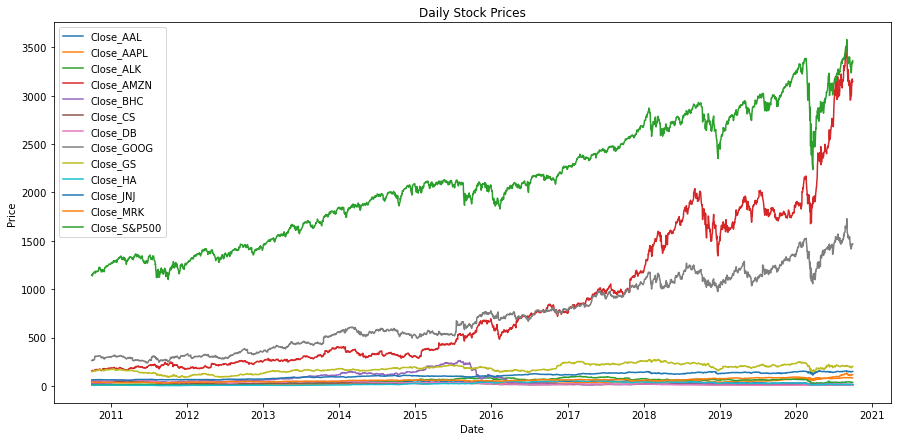

In [75]:
## Plot the Stock Price

plt.figure(figsize=[15,7])
plt.plot(stock_price)
plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stock_price)
plt.show()

#### Create the Normalised Stock Prices Dataset

In [76]:
## Create the Normalised Stock Prices dataframe

norm_stock_price = stock_price/np.array(stock_price[:1])
norm_stock_price.head()

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  Close_CS  \
Date                                                                            
2010-10-01   1.000000    1.000000   1.000000    1.000000   1.000000  1.000000   
2010-10-04   0.981701    0.986266   0.975497    1.010930   1.004660  0.992599   
2010-10-05   0.993541    1.022724   0.981322    1.046581   1.021359  1.021970   
2010-10-06   0.993541    1.023609   0.979112    1.010995   1.036505  1.028677   
2010-10-07   0.994618    1.023715   0.933922    1.016655   1.033010  1.034228   

            Close_DB  Close_GOOG  Close_GS  Close_HA  Close_JNJ  Close_MRK  \
Date                                                                         
2010-10-01  1.000000    1.000000  1.000000  1.000000   1.000000   1.000000   
2010-10-04  0.984035    0.993779  0.992349  0.964765   0.998704   0.997814   
2010-10-05  1.025762    1.023991  1.012661  0.981544   1.017004   1.011475   
2010-10-06  1.038280    1.016609  1.021259  1.001678   1.023644   1.011202   
2010-10-07  1.027395    1.008352  1.023087  1.031879   1.023806   1.003005   

            Close_S&P500  
Date                      
2010-10-01      1.000000  
2010-10-04      0.991965  
2010-10-05      1.012659  
2010-10-06      1.011978  
2010-10-07      1.010312

In [77]:
## Check the rows and columns of the dataframe

norm_stock_price.shape

(2517, 13)

#### Plot the Normalised Daily Stock Prices

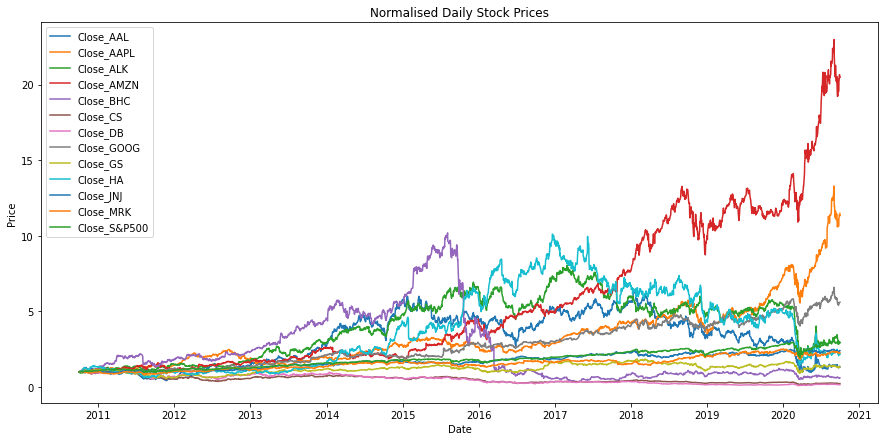

In [78]:
## Plot the Normalised Daily Stock Prices

plt.figure(figsize=[15,7])
plt.plot(norm_stock_price)
plt.title('Normalised Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(norm_stock_price)
plt.show()

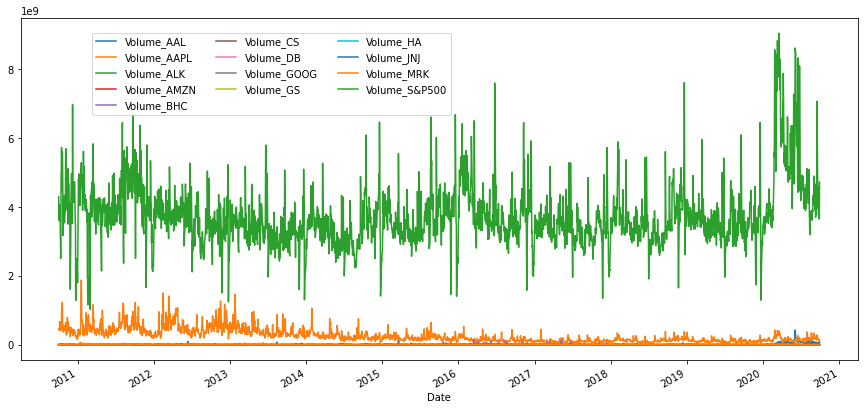

In [79]:
#Plot the Distribution of Daily Volume of stocks 

cols_volume = data.columns[data.columns.str.contains('Volume')]
data[cols_volume].plot(figsize=(15,7))
plt.legend(data[cols_volume], loc='best', bbox_to_anchor=(0.3, 0.7), ncol=3)
plt.show()

#### Stock Price Dispersion from Mean - Visualization

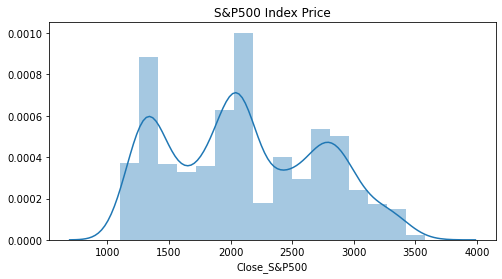

In [80]:
## Distribution Plot for Market Index S&P500

plt.figure(figsize=[8,4])
sns.distplot(stock_price['Close_S&P500'])
plt.title('S&P500 Index Price')
plt.show()

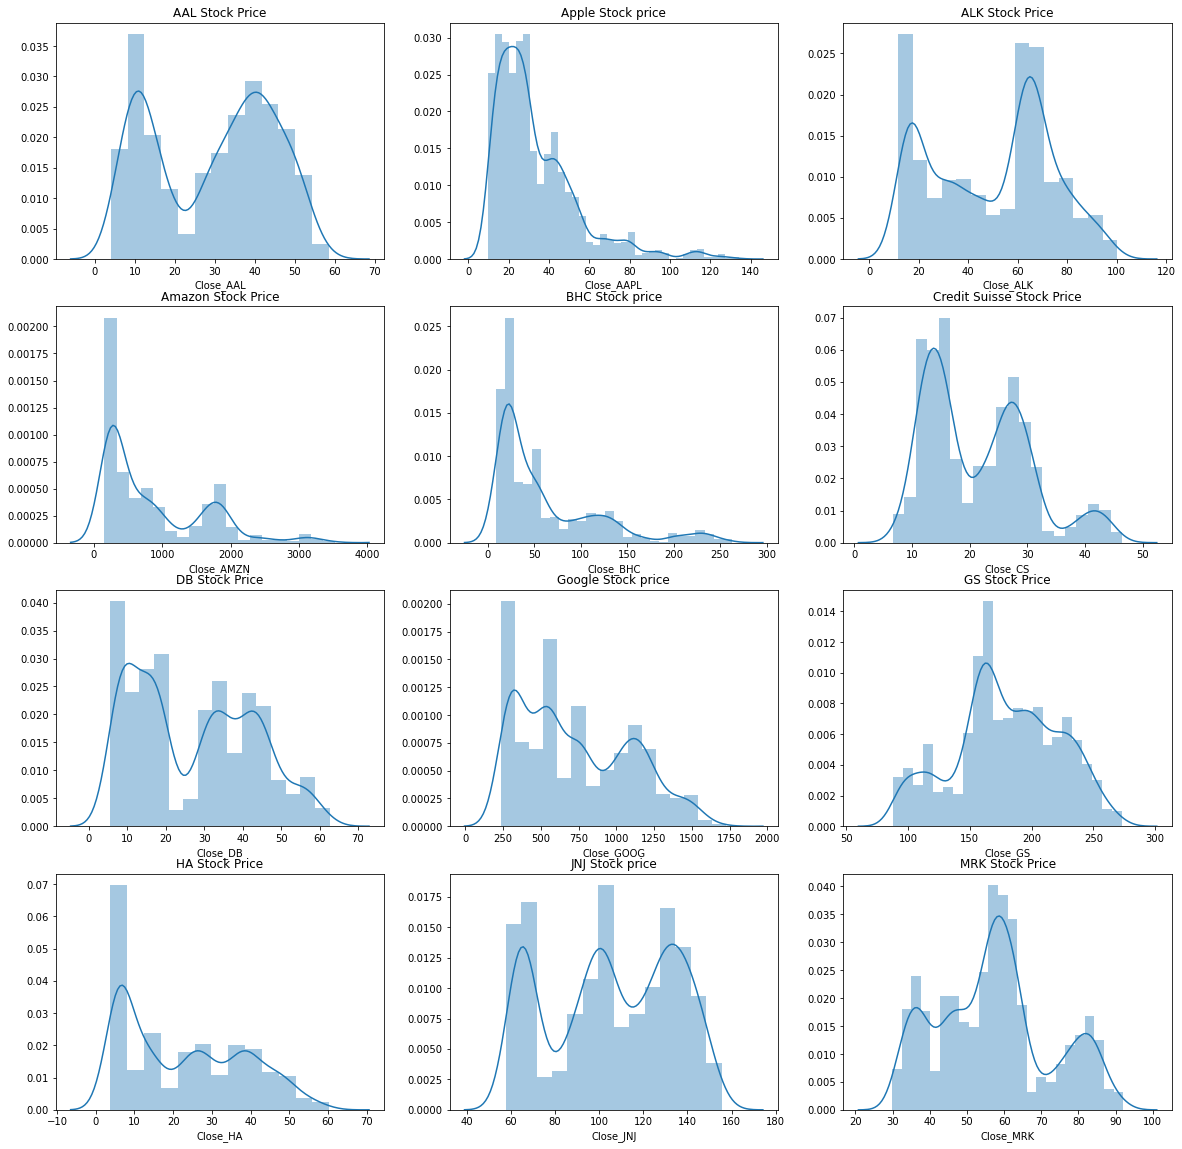

In [81]:
# Plot the distribution plot of different stocks

plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.distplot(stock_price['Close_AAL'])
plt.title('AAL Stock Price')
plt.subplot(4,3,2)
sns.distplot(stock_price['Close_AAPL'])
plt.title('Apple Stock price')
plt.subplot(4,3,3)
sns.distplot(stock_price['Close_ALK'])
plt.title('ALK Stock Price')
plt.subplot(4,3,4)
sns.distplot(stock_price['Close_AMZN'])
plt.title('Amazon Stock Price')
plt.subplot(4,3,5)
sns.distplot(stock_price['Close_BHC'])
plt.title('BHC Stock price')
plt.subplot(4,3,6)
sns.distplot(stock_price['Close_CS'])
plt.title('Credit Suisse Stock Price')
plt.subplot(4,3,7)
sns.distplot(stock_price['Close_DB'])
plt.title('DB Stock Price')
plt.subplot(4,3,8)
sns.distplot(stock_price['Close_GOOG'])
plt.title('Google Stock price')
plt.subplot(4,3,9)
sns.distplot(stock_price['Close_GS'])
plt.title('GS Stock Price')
plt.subplot(4,3,10)
sns.distplot(stock_price['Close_HA'])
plt.title('HA Stock Price')
plt.subplot(4,3,11)
sns.distplot(stock_price['Close_JNJ'])
plt.title('JNJ Stock price')
plt.subplot(4,3,12)
sns.distplot(stock_price['Close_MRK'])
plt.title('MRK Stock Price')
plt.show()

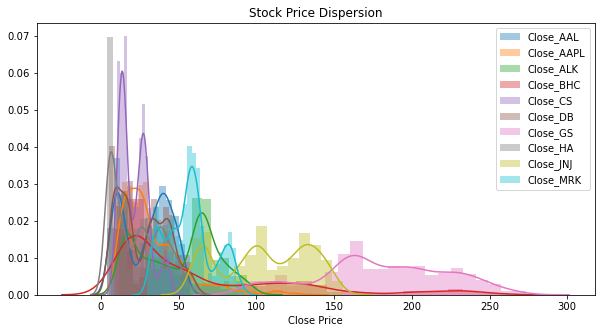

In [82]:
## Plot the Distribution Graph 1

plt.figure(figsize=[10,5])
sns.distplot(stock_price['Close_AAL'])
sns.distplot(stock_price['Close_AAPL'])
sns.distplot(stock_price['Close_ALK'])
#sns.distplot(stock_price['Close_AMZN'])
sns.distplot(stock_price['Close_BHC'])
sns.distplot(stock_price['Close_CS'])
sns.distplot(stock_price['Close_DB'])
#sns.distplot(stock_price['Close_GOOG'])
sns.distplot(stock_price['Close_GS'])
sns.distplot(stock_price['Close_HA'])
sns.distplot(stock_price['Close_JNJ'])
sns.distplot(stock_price['Close_MRK'])
plt.title('Stock Price Dispersion')
plt.xlabel('Close Price')
plt.legend(stock_price[['Close_AAL','Close_AAPL','Close_ALK','Close_BHC','Close_CS','Close_DB','Close_GS',
                        'Close_HA','Close_JNJ','Close_MRK']])
plt.show()

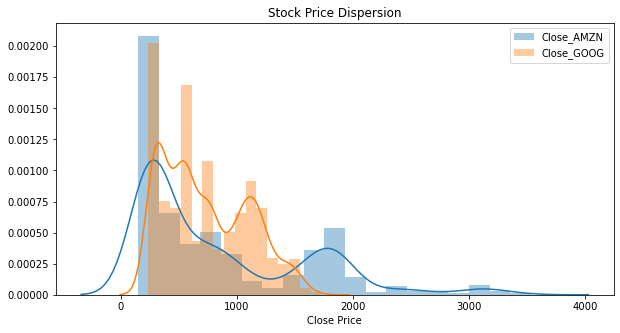

In [83]:
## Plot the distribution Graph 2

plt.figure(figsize=[10,5])
sns.distplot(stock_price['Close_AMZN'])
sns.distplot(stock_price['Close_GOOG'])
plt.title('Stock Price Dispersion')
plt.xlabel('Close Price')
plt.legend(stock_price[['Close_AMZN','Close_GOOG']])
plt.show()

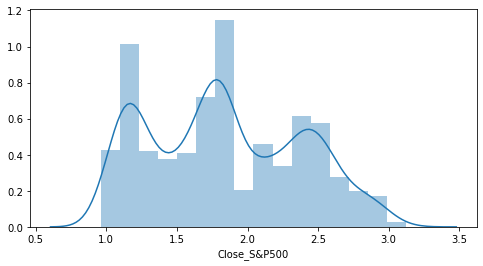

In [84]:
## Distribution Plot for Market Index S&P500 Normalised

plt.figure(figsize=[8,4])
sns.distplot(norm_stock_price['Close_S&P500'])
plt.show()

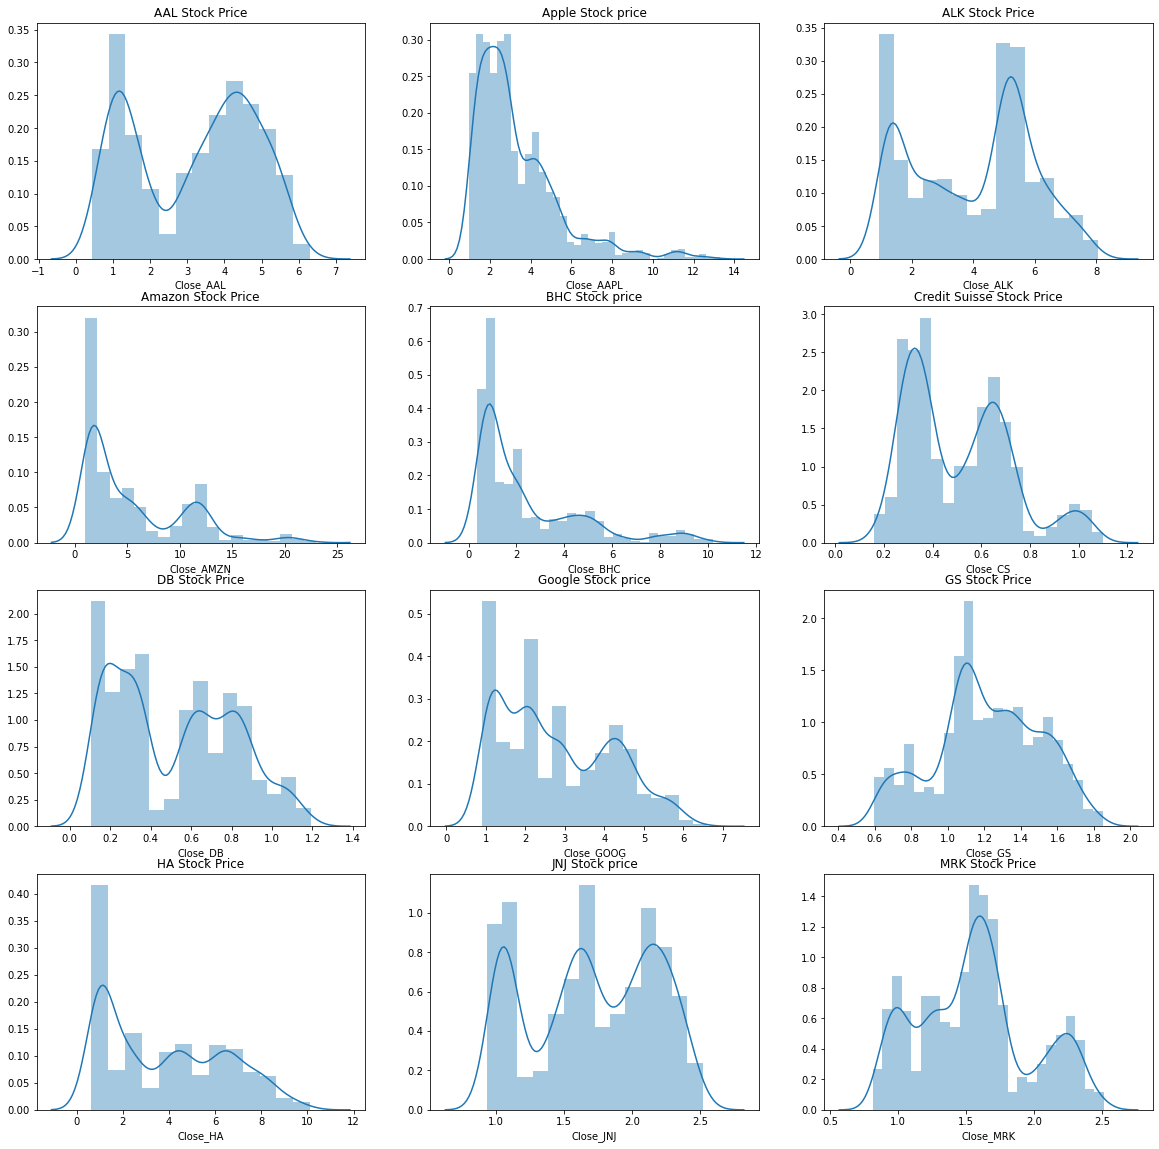

In [85]:
# Plot the distribution plot of Normalised Stock Prices

plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.distplot(norm_stock_price['Close_AAL'])
plt.title('AAL Stock Price')
plt.subplot(4,3,2)
sns.distplot(norm_stock_price['Close_AAPL'])
plt.title('Apple Stock price')
plt.subplot(4,3,3)
sns.distplot(norm_stock_price['Close_ALK'])
plt.title('ALK Stock Price')
plt.subplot(4,3,4)
sns.distplot(norm_stock_price['Close_AMZN'])
plt.title('Amazon Stock Price')
plt.subplot(4,3,5)
sns.distplot(norm_stock_price['Close_BHC'])
plt.title('BHC Stock price')
plt.subplot(4,3,6)
sns.distplot(norm_stock_price['Close_CS'])
plt.title('Credit Suisse Stock Price')
plt.subplot(4,3,7)
sns.distplot(norm_stock_price['Close_DB'])
plt.title('DB Stock Price')
plt.subplot(4,3,8)
sns.distplot(norm_stock_price['Close_GOOG'])
plt.title('Google Stock price')
plt.subplot(4,3,9)
sns.distplot(norm_stock_price['Close_GS'])
plt.title('GS Stock Price')
plt.subplot(4,3,10)
sns.distplot(norm_stock_price['Close_HA'])
plt.title('HA Stock Price')
plt.subplot(4,3,11)
sns.distplot(norm_stock_price['Close_JNJ'])
plt.title('JNJ Stock price')
plt.subplot(4,3,12)
sns.distplot(norm_stock_price['Close_MRK'])
plt.title('MRK Stock Price')
plt.show()

<Figure size 1080x720 with 0 Axes>

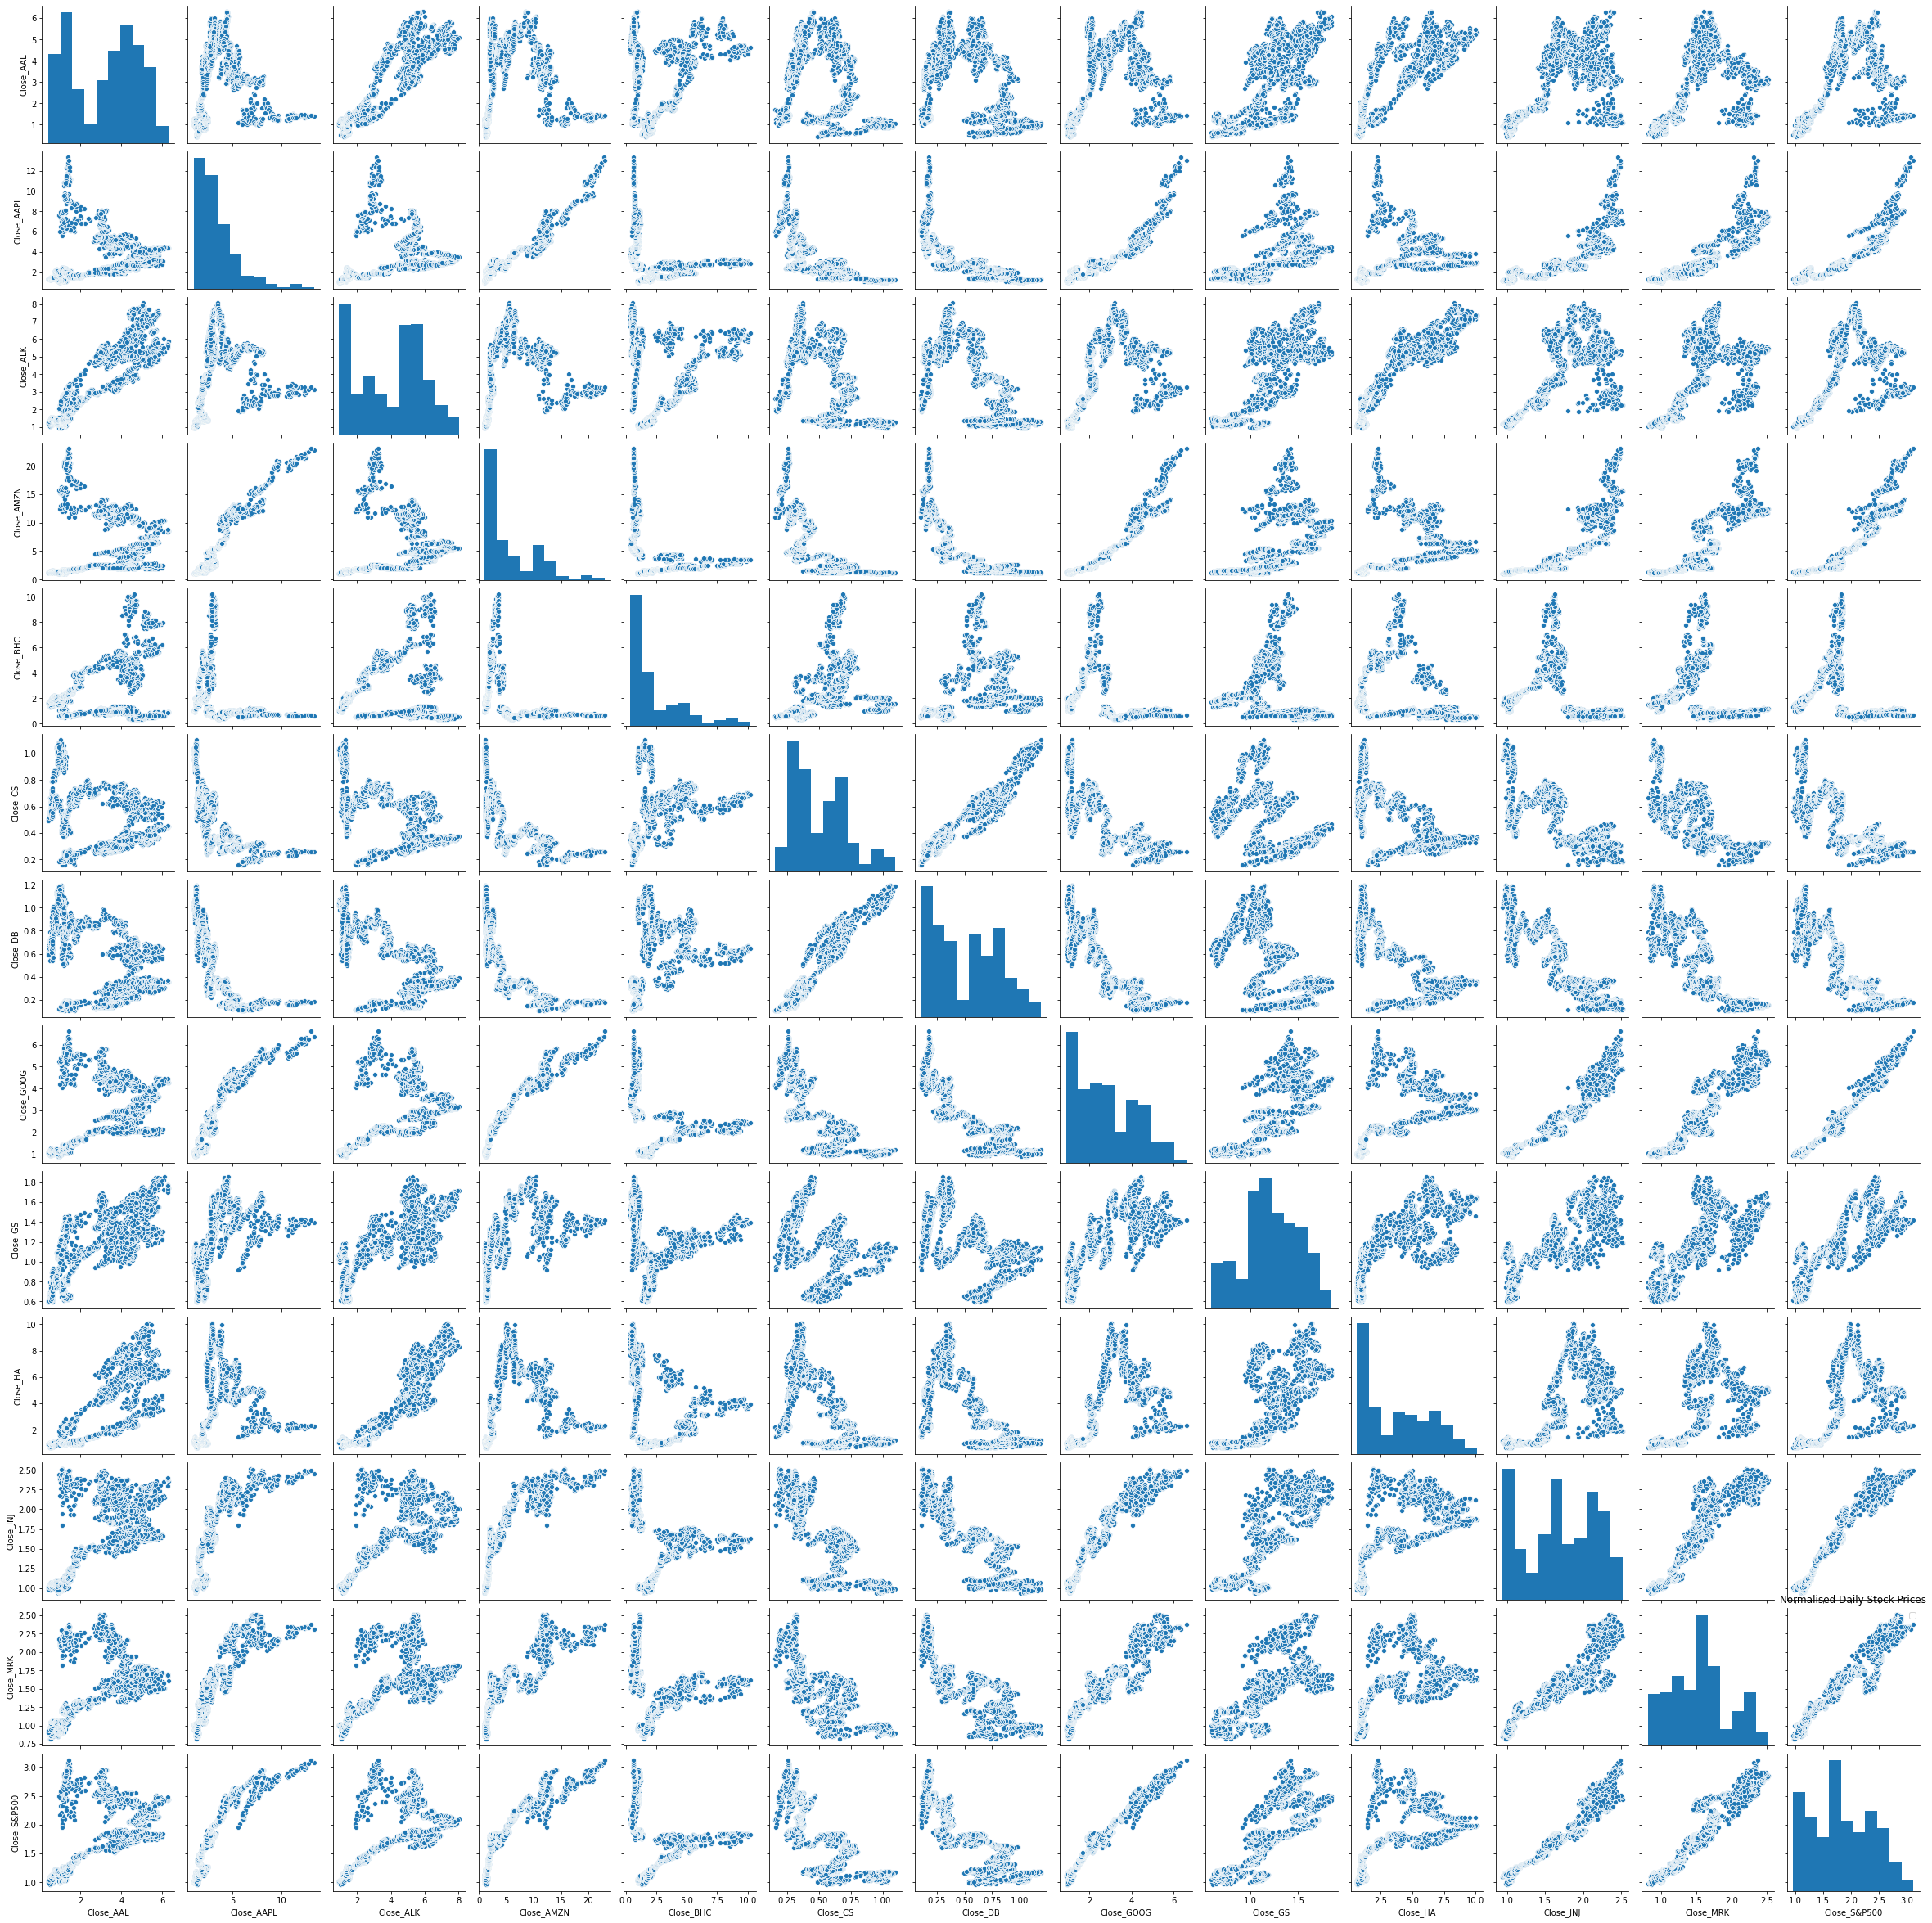

In [86]:
## Plot all the stocks pairwise

plt.figure(figsize=[15,10])
sns.pairplot(norm_stock_price)
plt.title('Normalised Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(norm_stock_price)
plt.show()

#### Inference - 
- GOOG, JNJ, MRK are the stocks which shows strong correlation with the Market Index S&P500.
- AAPL & AMZN also seem to be correlated with Market Index.

#### Calculate Daily Returns of Stock

In [87]:
# Daily Returns

returns = stock_price.pct_change()
returns.head()

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  Close_CS  \
Date                                                                            
2010-10-01        NaN         NaN        NaN         NaN        NaN       NaN   
2010-10-04  -0.018299   -0.013734  -0.024503    0.010930   0.004660 -0.007401   
2010-10-05   0.012061    0.036965   0.005971    0.035266   0.016621  0.029590   
2010-10-06   0.000000    0.000865  -0.002251   -0.034003   0.014829  0.006563   
2010-10-07   0.001083    0.000104  -0.046154    0.005599  -0.003372  0.005396   

            Close_DB  Close_GOOG  Close_GS  Close_HA  Close_JNJ  Close_MRK  \
Date                                                                         
2010-10-01       NaN         NaN       NaN       NaN        NaN        NaN   
2010-10-04 -0.015965   -0.006221 -0.007651 -0.035235  -0.001296  -0.002186   
2010-10-05  0.042404    0.030401  0.020468  0.017391   0.018323   0.013691   
2010-10-06  0.012204   -0.007209  0.008491  0.020513   0.006529  -0.000270   
2010-10-07 -0.010484   -0.008122  0.001790  0.030151   0.000158  -0.008106   

            Close_S&P500  
Date                      
2010-10-01           NaN  
2010-10-04     -0.008035  
2010-10-05      0.020861  
2010-10-06     -0.000672  
2010-10-07     -0.001647

In [88]:
# Dropping the rows with missing values

returns = returns.dropna(axis=0)

In [89]:
## Check the shape of the dataframe

returns.shape

(2516, 13)

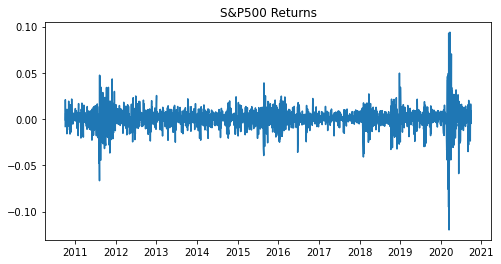

In [90]:
## Plot for Market Index S&P500 Returns

plt.figure(figsize=[8,4])
plt.plot(returns['Close_S&P500'])
plt.title('S&P500 Returns')
plt.show()

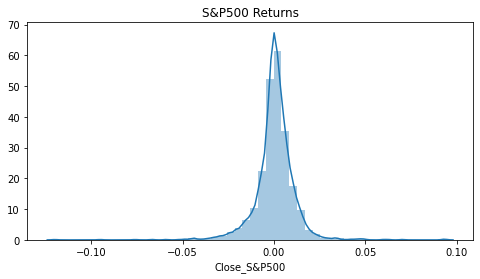

In [91]:
## Distribution Plot for Market Index S&P500 Returns

plt.figure(figsize=[8,4])
sns.distplot(returns['Close_S&P500'])
plt.title('S&P500 Returns')
plt.show()

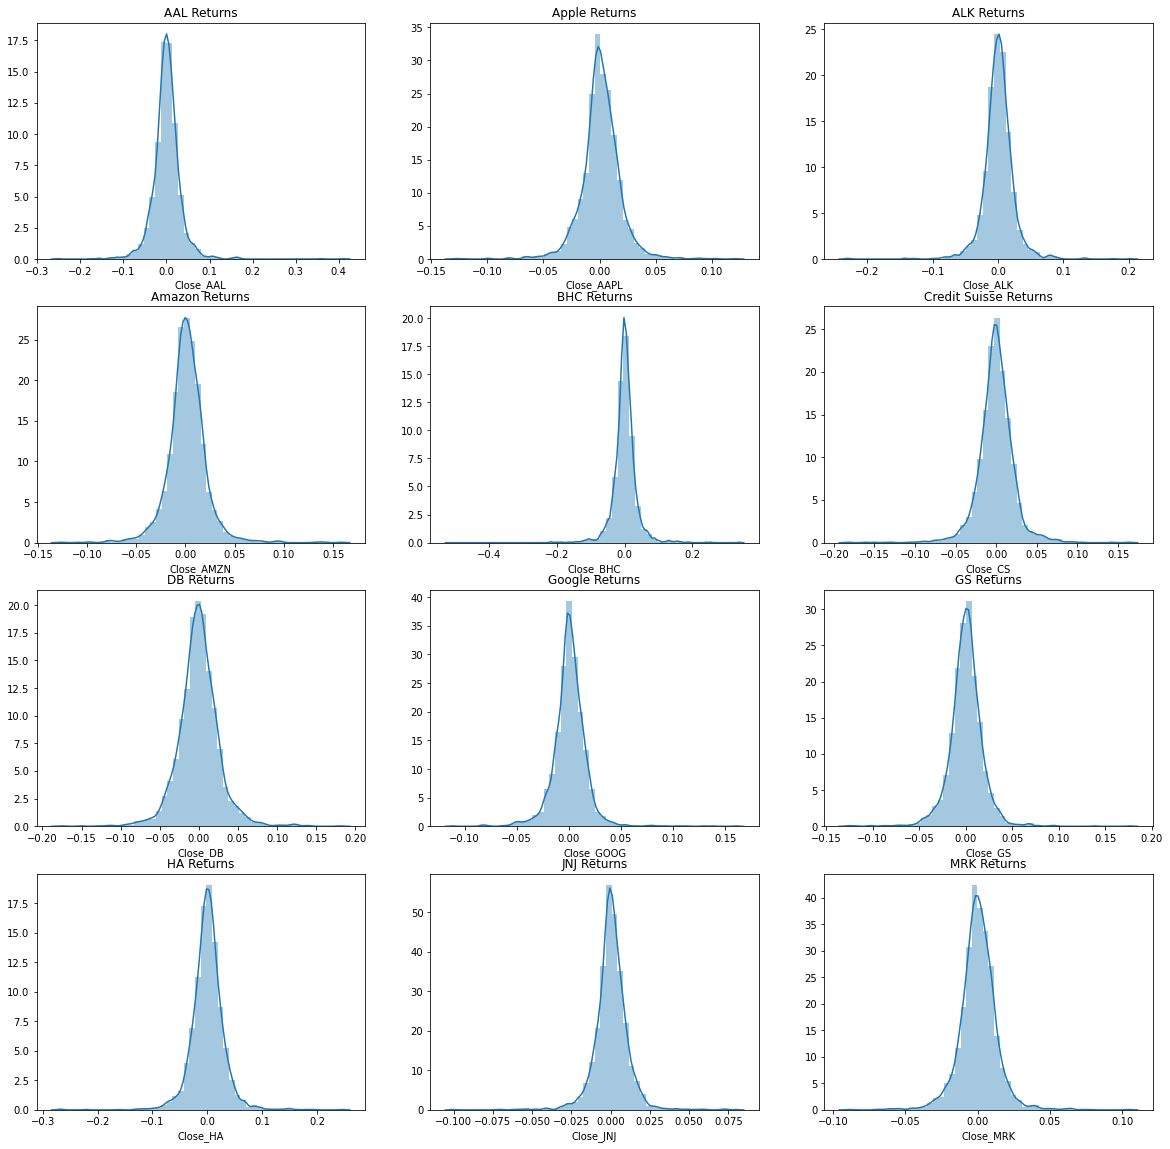

In [92]:
# Plot the distribution plot of Daily Returns

plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.distplot(returns['Close_AAL'])
plt.title('AAL Returns')
plt.subplot(4,3,2)
sns.distplot(returns['Close_AAPL'])
plt.title('Apple Returns')
plt.subplot(4,3,3)
sns.distplot(returns['Close_ALK'])
plt.title('ALK Returns')
plt.subplot(4,3,4)
sns.distplot(returns['Close_AMZN'])
plt.title('Amazon Returns')
plt.subplot(4,3,5)
sns.distplot(returns['Close_BHC'])
plt.title('BHC Returns')
plt.subplot(4,3,6)
sns.distplot(returns['Close_CS'])
plt.title('Credit Suisse Returns')
plt.subplot(4,3,7)
sns.distplot(returns['Close_DB'])
plt.title('DB Returns')
plt.subplot(4,3,8)
sns.distplot(returns['Close_GOOG'])
plt.title('Google Returns')
plt.subplot(4,3,9)
sns.distplot(returns['Close_GS'])
plt.title('GS Returns')
plt.subplot(4,3,10)
sns.distplot(returns['Close_HA'])
plt.title('HA Returns')
plt.subplot(4,3,11)
sns.distplot(returns['Close_JNJ'])
plt.title('JNJ Returns')
plt.subplot(4,3,12)
sns.distplot(returns['Close_MRK'])
plt.title('MRK Returns')
plt.show()

#### Average daily return from each stock

In [93]:
# Average daily return from each stock

returns_mean = returns.mean()
returns_mean

Close_AAL       0.000637
Close_AAPL      0.001128
Close_ALK       0.000709
Close_AMZN      0.001398
Close_BHC       0.000464
Close_CS       -0.000325
Close_DB       -0.000381
Close_GOOG      0.000818
Close_GS        0.000291
Close_HA        0.000765
Close_JNJ       0.000409
Close_MRK       0.000410
Close_S&P500    0.000488
dtype: float64

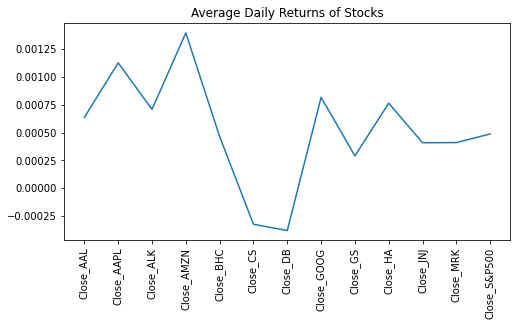

In [94]:
# Average Daily Returns Plot

plt.figure(figsize=[8,4])
plt.plot(returns_mean)
plt.xticks(rotation=90)
plt.title('Average Daily Returns of Stocks')
plt.show()

#### Annualised Return of Stocks

In [95]:
## Annualised Returns

ann_returns = 252*returns_mean
ann_returns

Close_AAL       0.160489
Close_AAPL      0.284164
Close_ALK       0.178792
Close_AMZN      0.352201
Close_BHC       0.116973
Close_CS       -0.081888
Close_DB       -0.096102
Close_GOOG      0.206023
Close_GS        0.073212
Close_HA        0.192824
Close_JNJ       0.103009
Close_MRK       0.103385
Close_S&P500    0.122966
dtype: float64

In [96]:
# Annualized Returns in Percent

ann_returns_pct = ann_returns*100
ann_returns_pct

Close_AAL       16.048889
Close_AAPL      28.416386
Close_ALK       17.879160
Close_AMZN      35.220120
Close_BHC       11.697321
Close_CS        -8.188845
Close_DB        -9.610244
Close_GOOG      20.602336
Close_GS         7.321234
Close_HA        19.282441
Close_JNJ       10.300879
Close_MRK       10.338527
Close_S&P500    12.296594
dtype: float64

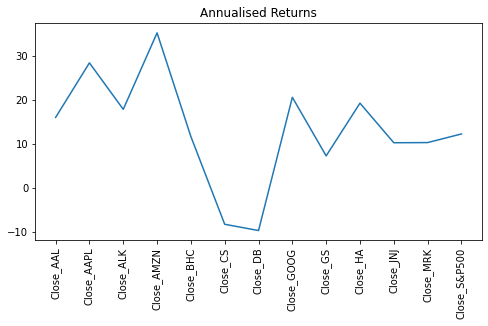

In [97]:
# Annualised Returns Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(ann_returns_pct)
plt.xticks(rotation=90)
plt.title('Annualised Returns')
plt.show()

#### Statistical Summary of Daily Returns

- Maximum
- Minimum
- Count

In [98]:
## Describe the Daily Returns

returns.describe()

Close_AAL   Close_AAPL    Close_ALK   Close_AMZN    Close_BHC  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      0.000637     0.001128     0.000709     0.001398     0.000464   
std       0.032726     0.017719     0.023562     0.019889     0.035700   
min      -0.252246    -0.128647    -0.232385    -0.126568    -0.514629   
25%      -0.014116    -0.006971    -0.010126    -0.008133    -0.013011   
50%       0.000216     0.000891     0.000788     0.001107     0.000431   
75%       0.015593     0.010209     0.011655     0.011457     0.014973   
max       0.410970     0.119808     0.203079     0.157457     0.337444   

          Close_CS     Close_DB   Close_GOOG     Close_GS     Close_HA  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     -0.000325    -0.000381     0.000818     0.000291     0.000765   
std       0.022206     0.026374     0.016288     0.018331     0.030147   
min      -0.182598    -0.174888    -0.111008    -0.127053    -0.269722   
25%      -0.010897    -0.013920    -0.006431    -0.008367    -0.013826   
50%       0.000000    -0.000495     0.000659     0.000490     0.000451   
75%       0.010796     0.013712     0.008646     0.009413     0.015317   
max       0.163447     0.179506     0.160524     0.175803     0.245837   

         Close_JNJ    Close_MRK  Close_S&P500  
count  2516.000000  2516.000000   2516.000000  
mean      0.000409     0.000410      0.000488  
std       0.010847     0.013049      0.010934  
min      -0.100379    -0.088990     -0.119841  
25%      -0.004283    -0.006119     -0.003308  
50%       0.000299     0.000283      0.000653  
75%       0.005656     0.007303      0.005229  
max       0.079977     0.104080      0.093828

#### Risk/Volatility of Stock - Standard Deviation

In [99]:
# Risk associated with Stock 

risk = returns.std()
risk

Close_AAL       0.032726
Close_AAPL      0.017719
Close_ALK       0.023562
Close_AMZN      0.019889
Close_BHC       0.035700
Close_CS        0.022206
Close_DB        0.026374
Close_GOOG      0.016288
Close_GS        0.018331
Close_HA        0.030147
Close_JNJ       0.010847
Close_MRK       0.013049
Close_S&P500    0.010934
dtype: float64

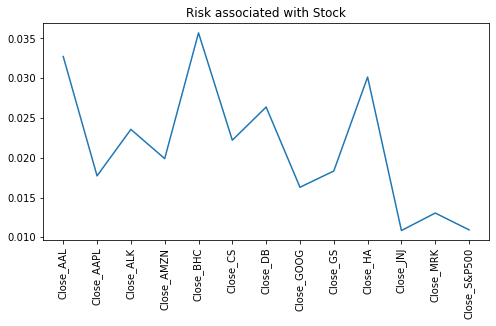

In [100]:
# Plot for Risk associated with Stock

plt.figure(figsize=[8,4])
plt.plot(risk)
plt.xticks(rotation=90)
plt.title('Risk associated with Stock')
plt.show()

#### Annualized Risk

In [101]:
## Annualised Risk - Calculated using No of Trading Days which is 252

ann_risk = np.sqrt(252)*risk
ann_risk

Close_AAL       0.519504
Close_AAPL      0.281273
Close_ALK       0.374043
Close_AMZN      0.315735
Close_BHC       0.566714
Close_CS        0.352509
Close_DB        0.418676
Close_GOOG      0.258561
Close_GS        0.290996
Close_HA        0.478573
Close_JNJ       0.172187
Close_MRK       0.207142
Close_S&P500    0.173574
dtype: float64

In [102]:
# Annualized Risk in Percent

ann_risk_pct = ann_risk*100
ann_risk_pct

Close_AAL       51.950444
Close_AAPL      28.127302
Close_ALK       37.404274
Close_AMZN      31.573504
Close_BHC       56.671428
Close_CS        35.250863
Close_DB        41.867595
Close_GOOG      25.856093
Close_GS        29.099614
Close_HA        47.857323
Close_JNJ       17.218738
Close_MRK       20.714241
Close_S&P500    17.357439
dtype: float64

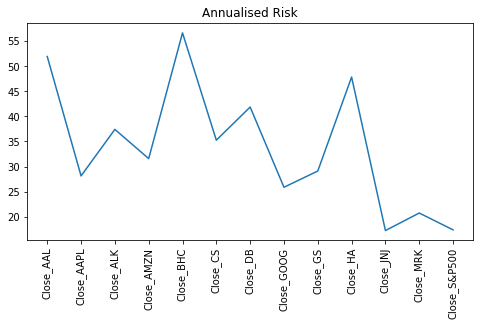

In [103]:
# Annualised Risk Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(ann_risk_pct)
plt.xticks(rotation=90)
plt.title('Annualised Risk')
plt.show()

#### Correlation Analysis of Daily Returns

Plot the correlation heatmap among stocks and different Industry Groups

In [104]:
## Correlation among stocks from Aviation Industry

returns[['Close_AAL', 'Close_ALK', 'Close_HA', 'Close_S&P500']].corr()

Close_AAL  Close_ALK  Close_HA  Close_S&P500
Close_AAL      1.000000   0.683873  0.611077      0.452262
Close_ALK      0.683873   1.000000  0.637932      0.571482
Close_HA       0.611077   0.637932  1.000000      0.447392
Close_S&P500   0.452262   0.571482  0.447392      1.000000

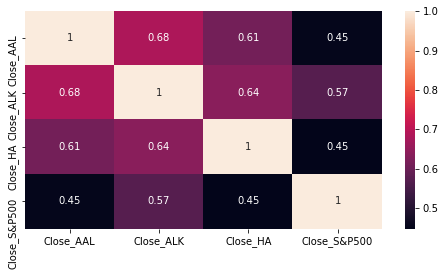

In [105]:
## Plot the heatmap from Aviation Industry

plt.figure(figsize=(8,4))
sns.heatmap(returns[['Close_AAL', 'Close_ALK', 'Close_HA', 'Close_S&P500']].corr(), annot=True)
plt.show()

In [106]:
## Correlation among stocks from Finance Industry

returns[['Close_CS', 'Close_DB', 'Close_GS', 'Close_S&P500']].corr()

Close_CS  Close_DB  Close_GS  Close_S&P500
Close_CS      1.000000  0.784012  0.679134      0.674586
Close_DB      0.784012  1.000000  0.662503      0.637435
Close_GS      0.679134  0.662503  1.000000      0.776195
Close_S&P500  0.674586  0.637435  0.776195      1.000000

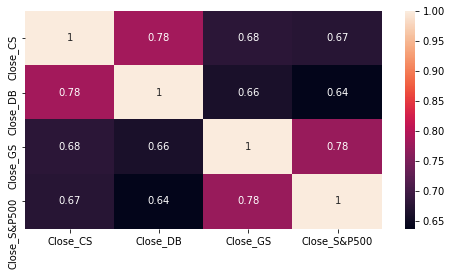

In [107]:
## Plot the heatmap from Finance Industry

plt.figure(figsize=(8,4))
sns.heatmap(returns[['Close_CS', 'Close_DB', 'Close_GS', 'Close_S&P500']].corr(), annot=True)
plt.show()

In [108]:
## Correlation among stocks from Healthcare Industry

returns[['Close_BHC', 'Close_JNJ', 'Close_MRK', 'Close_S&P500']].corr()

Close_BHC  Close_JNJ  Close_MRK  Close_S&P500
Close_BHC      1.000000   0.244851   0.298431      0.403058
Close_JNJ      0.244851   1.000000   0.579313      0.667567
Close_MRK      0.298431   0.579313   1.000000      0.614614
Close_S&P500   0.403058   0.667567   0.614614      1.000000

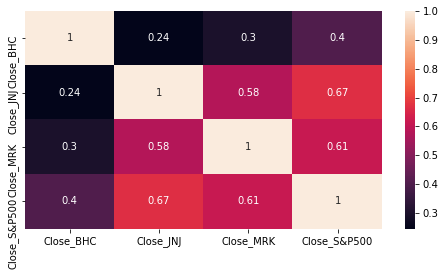

In [109]:
## Plot the heatmap from Healthcare Industry

plt.figure(figsize=(8,4))
sns.heatmap(returns[['Close_BHC', 'Close_JNJ', 'Close_MRK', 'Close_S&P500']].corr(), annot=True)
plt.show()

In [110]:
## Correlation among stocks from Technology Industry

returns[['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_S&P500']].corr()

Close_AAPL  Close_AMZN  Close_GOOG  Close_S&P500
Close_AAPL      1.000000    0.434282    0.525112      0.656196
Close_AMZN      0.434282    1.000000    0.575220      0.549089
Close_GOOG      0.525112    0.575220    1.000000      0.680263
Close_S&P500    0.656196    0.549089    0.680263      1.000000

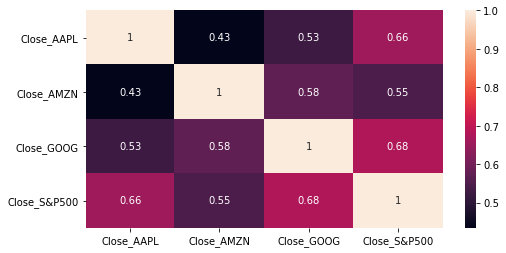

In [111]:
## Plot the heatmap from Technology Industry

plt.figure(figsize=(8,4))
sns.heatmap(returns[['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_S&P500']].corr(), annot=True)
plt.show()

In [112]:
## Correlation among all the Stocks along with Market Returns

returns.corr()

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  \
Close_AAL      1.000000    0.268273   0.683873    0.214570   0.231306   
Close_AAPL     0.268273    1.000000   0.323868    0.434282   0.235576   
Close_ALK      0.683873    0.323868   1.000000    0.269709   0.281910   
Close_AMZN     0.214570    0.434282   0.269709    1.000000   0.201206   
Close_BHC      0.231306    0.235576   0.281910    0.201206   1.000000   
Close_CS       0.355856    0.363215   0.428636    0.288556   0.318762   
Close_DB       0.377147    0.348164   0.415241    0.307985   0.283467   
Close_GOOG     0.263919    0.525112   0.353785    0.575220   0.265257   
Close_GS       0.445376    0.454586   0.499135    0.357113   0.324467   
Close_HA       0.611077    0.260246   0.637932    0.195561   0.199508   
Close_JNJ      0.233708    0.371942   0.305176    0.322337   0.244851   
Close_MRK      0.226986    0.328849   0.304483    0.272079   0.298431   
Close_S&P500   0.452262    0.656196   0.571482    0.549089   0.403058   

              Close_CS  Close_DB  Close_GOOG  Close_GS  Close_HA  Close_JNJ  \
Close_AAL     0.355856  0.377147    0.263919  0.445376  0.611077   0.233708   
Close_AAPL    0.363215  0.348164    0.525112  0.454586  0.260246   0.371942   
Close_ALK     0.428636  0.415241    0.353785  0.499135  0.637932   0.305176   
Close_AMZN    0.288556  0.307985    0.575220  0.357113  0.195561   0.322337   
Close_BHC     0.318762  0.283467    0.265257  0.324467  0.199508   0.244851   
Close_CS      1.000000  0.784012    0.411935  0.679134  0.349373   0.371551   
Close_DB      0.784012  1.000000    0.393680  0.662503  0.350498   0.339576   
Close_GOOG    0.411935  0.393680    1.000000  0.486660  0.260049   0.412967   
Close_GS      0.679134  0.662503    0.486660  1.000000  0.427178   0.452097   
Close_HA      0.349373  0.350498    0.260049  0.427178  1.000000   0.240486   
Close_JNJ     0.371551  0.339576    0.412967  0.452097  0.240486   1.000000   
Close_MRK     0.387127  0.357285    0.364824  0.428832  0.233069   0.579313   
Close_S&P500  0.674586  0.637435    0.680263  0.776195  0.447392   0.667567   

              Close_MRK  Close_S&P500  
Close_AAL      0.226986      0.452262  
Close_AAPL     0.328849      0.656196  
Close_ALK      0.304483      0.571482  
Close_AMZN     0.272079      0.549089  
Close_BHC      0.298431      0.403058  
Close_CS       0.387127      0.674586  
Close_DB       0.357285      0.637435  
Close_GOOG     0.364824      0.680263  
Close_GS       0.428832      0.776195  
Close_HA       0.233069      0.447392  
Close_JNJ      0.579313      0.667567  
Close_MRK      1.000000      0.614614  
Close_S&P500   0.614614      1.000000

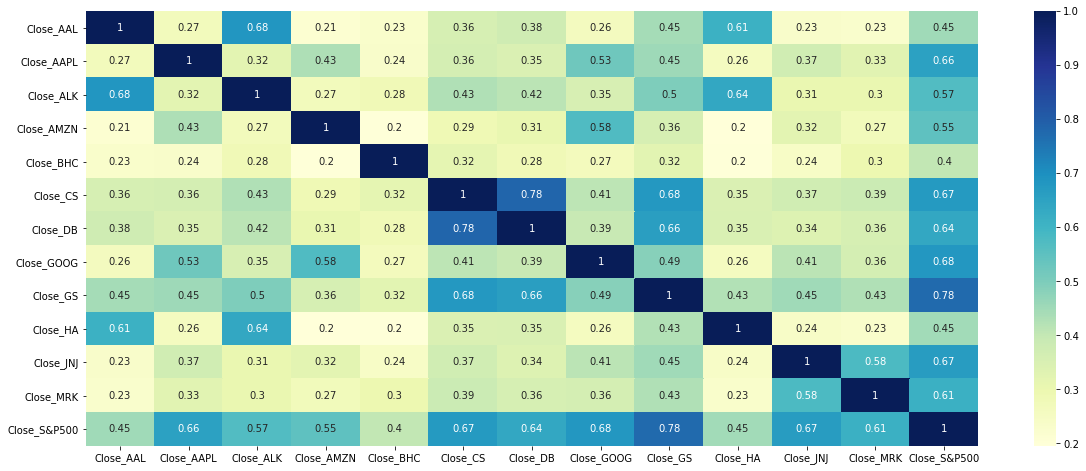

In [113]:
#Plot the correlation heatmap among all the stocks 

plt.figure(figsize=(20,8))
sns.heatmap(returns.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Cumulative Daily Returns

In [114]:
## Fetch the Last Row of Returns

stock_price.iloc[-1]

Close_AAL         12.290000
Close_AAPL       115.809998
Close_ALK         36.630001
Close_AMZN      3148.729980
Close_BHC         15.540000
Close_CS           9.970000
Close_DB           8.400000
Close_GOOG      1469.599976
Close_GS         200.970001
Close_HA          12.890000
Close_JNJ        148.880005
Close_MRK         82.949997
Close_S&P500    3363.000000
Name: 2020-09-30 00:00:00, dtype: float64

In [115]:
## Fetch the First Row of Returns

stock_price.iloc[0]

Close_AAL          9.290000
Close_AAPL        10.090000
Close_ALK         12.447500
Close_AMZN       153.710007
Close_BHC         25.750000
Close_CS          42.226563
Close_DB          52.595421
Close_GOOG       261.828613
Close_GS         147.699997
Close_HA           5.960000
Close_JNJ         61.750000
Close_MRK         36.599998
Close_S&P500    1146.239990
Name: 2010-10-01 00:00:00, dtype: float64

In [116]:
# Cumulative returns from the portfolio

cum_returns = stock_price[-1:]/np.array(stock_price[:1]) - 1
cum_returns

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  Close_CS  \
Date                                                                            
2020-09-30   0.322928     10.4777    1.94276   19.484873  -0.396505 -0.763893   

            Close_DB  Close_GOOG  Close_GS  Close_HA  Close_JNJ  Close_MRK  \
Date                                                                         
2020-09-30  -0.84029    4.612832  0.360664  1.162752   1.411012   1.266393   

            Close_S&P500  
Date                      
2020-09-30      1.933941

In [117]:
# Cumulative Returns in Percent

cum_returns_pct = cum_returns*100
cum_returns_pct

Close_AAL  Close_AAPL   Close_ALK   Close_AMZN  Close_BHC  \
Date                                                                    
2020-09-30  32.292788  1047.77005  194.275967  1948.487305 -39.650485   

             Close_CS   Close_DB  Close_GOOG   Close_GS    Close_HA  \
Date                                                                  
2020-09-30 -76.389269 -84.029028  461.283184  36.066354  116.275168   

             Close_JNJ   Close_MRK  Close_S&P500  
Date                                              
2020-09-30  141.101223  126.639348    193.394056

In [118]:
## Transpose the Cumulative Returns Percent

cum_returns_pct = cum_returns_pct.transpose()
cum_returns_pct

Date           2020-09-30
Close_AAL       32.292788
Close_AAPL    1047.770050
Close_ALK      194.275967
Close_AMZN    1948.487305
Close_BHC      -39.650485
Close_CS       -76.389269
Close_DB       -84.029028
Close_GOOG     461.283184
Close_GS        36.066354
Close_HA       116.275168
Close_JNJ      141.101223
Close_MRK      126.639348
Close_S&P500   193.394056

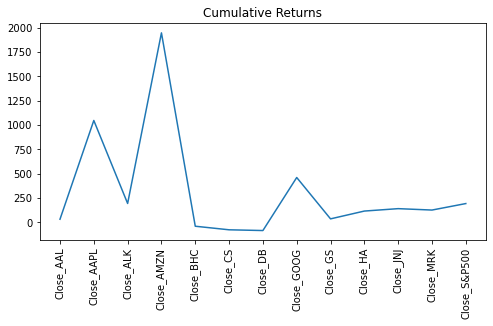

In [119]:
# Cumulative Returns Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(cum_returns_pct)
plt.xticks(rotation=90)
plt.title('Cumulative Returns')
plt.show()

In [120]:
## Concatening the Returns and Risk in a single dataframe for Stock Analysis

return_risk = pd.concat([ann_returns_pct, ann_risk_pct, cum_returns_pct], axis=1)
return_risk.columns = ['Ann Returns', 'Ann Risk', 'Cum Returns']
return_risk

Ann Returns   Ann Risk  Cum Returns
Close_AAL       16.048889  51.950444    32.292788
Close_AAPL      28.416386  28.127302  1047.770050
Close_ALK       17.879160  37.404274   194.275967
Close_AMZN      35.220120  31.573504  1948.487305
Close_BHC       11.697321  56.671428   -39.650485
Close_CS        -8.188845  35.250863   -76.389269
Close_DB        -9.610244  41.867595   -84.029028
Close_GOOG      20.602336  25.856093   461.283184
Close_GS         7.321234  29.099614    36.066354
Close_HA        19.282441  47.857323   116.275168
Close_JNJ       10.300879  17.218738   141.101223
Close_MRK       10.338527  20.714241   126.639348
Close_S&P500    12.296594  17.357439   193.394056

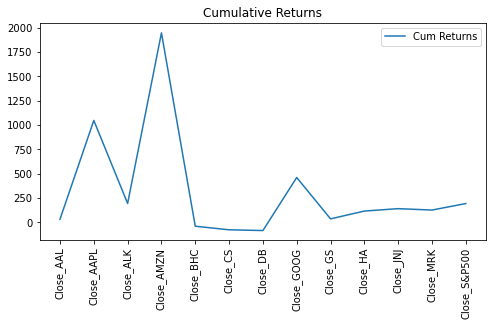

In [121]:
# Cumulative Returns Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(return_risk['Cum Returns'])
plt.xticks(rotation=90)
plt.title('Cumulative Returns')
plt.legend(return_risk[['Cum Returns']])
plt.show()

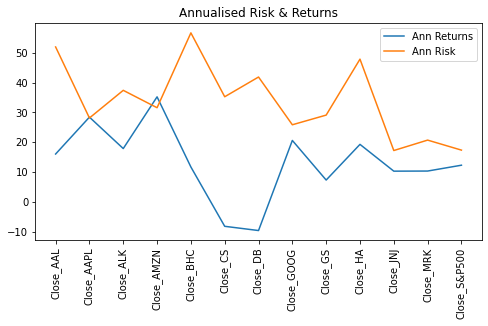

In [122]:
# Cumulative Returns Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(return_risk[['Ann Returns', 'Ann Risk']])
plt.xticks(rotation=90)
plt.title('Annualised Risk & Returns')
plt.legend(return_risk[['Ann Returns', 'Ann Risk']])
plt.show()

#### Comparison and contrast between stocks, industry groups, overall portfolio, and S&P500 Index

Daily Stock Prices - 

- Amazon Stock Prices are highest followed by Apple and Google.
- Few of the other stocks like Bausch Health, Hawaiian Holdings, American Airlines performed well initially but have been dropped in recent years.
- Apple & Goldman Sachs seems to be normally distributed with S&P500 while others are more dispersed from the mean.
- S&P500 Index Price is more dispersed from mean.

Daily Returns - 

- S&P500 Returns is normally distributed.
- All the stock returns are normally distributed.

Average Daily Returns, Annualised and Cumulative Returns -

- Amazon has highest Returns followed by Apple & Google.
- Deutsche Bank has lowest Returns. 

Risk and Annualised Risk - 

- Bausch Health is most riskier asset followed by American Airlines Group & Hawaiian Holdings.
- Johnson & Johnson is least riskier asset.

Correlation - 

- Aviation – none of the stocks are correlated with Market Index.
- Finance –  Goldman Sachs, Deutsche Bank & Credit Suisse have correlation with S&P500.
- Healthcare – Johnson & Johnson and Merck and CO are correlated with Market Index.
- Technology – Google & Apple are correlated with S&P500.
- Among each other – Deutsche Bank & Credit Suisse have strong correlation with each other and American Airlines & Alaska Air Group are also correlated with each other along with Hawaiian Holdings.


## Step3: Stock Analysis and Portfolio Management - CAPM

In [123]:
## Check the first few rows of the dataframe

returns.head()

Close_AAL  Close_AAPL  Close_ALK  Close_AMZN  Close_BHC  Close_CS  \
Date                                                                            
2010-10-04  -0.018299   -0.013734  -0.024503    0.010930   0.004660 -0.007401   
2010-10-05   0.012061    0.036965   0.005971    0.035266   0.016621  0.029590   
2010-10-06   0.000000    0.000865  -0.002251   -0.034003   0.014829  0.006563   
2010-10-07   0.001083    0.000104  -0.046154    0.005599  -0.003372  0.005396   
2010-10-08  -0.018398    0.016769   0.036344   -0.004607   0.009023 -0.015653   

            Close_DB  Close_GOOG  Close_GS  Close_HA  Close_JNJ  Close_MRK  \
Date                                                                         
2010-10-04 -0.015965   -0.006221 -0.007651 -0.035235  -0.001296  -0.002186   
2010-10-05  0.042404    0.030401  0.020468  0.017391   0.018323   0.013691   
2010-10-06  0.012204   -0.007209  0.008491  0.020513   0.006529  -0.000270   
2010-10-07 -0.010484   -0.008122  0.001790  0.030151   0.000158  -0.008106   
2010-10-08 -0.003002    0.011962  0.010257  0.000000   0.000158   0.005448   

            Close_S&P500  
Date                      
2010-10-04     -0.008035  
2010-10-05      0.020861  
2010-10-06     -0.000672  
2010-10-07     -0.001647  
2010-10-08      0.006122

#### Plot the Daily Returns Distribution of stocks against Market Returns

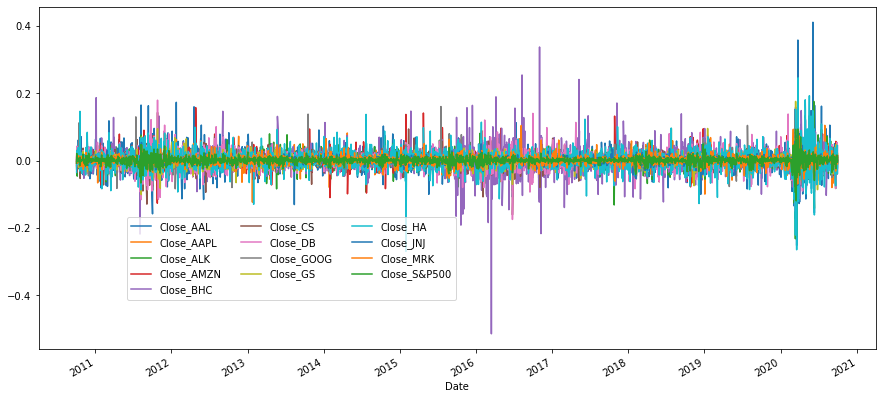

In [124]:
#Plot the Distribution of Daily Returns of the stocks 

returns.plot(figsize=(15,7))
plt.legend(returns, loc='upper left', bbox_to_anchor=(0.1, 0.4), ncol=3)
plt.show()

#### Distribution using the Scatter Plot of the Stock Returns

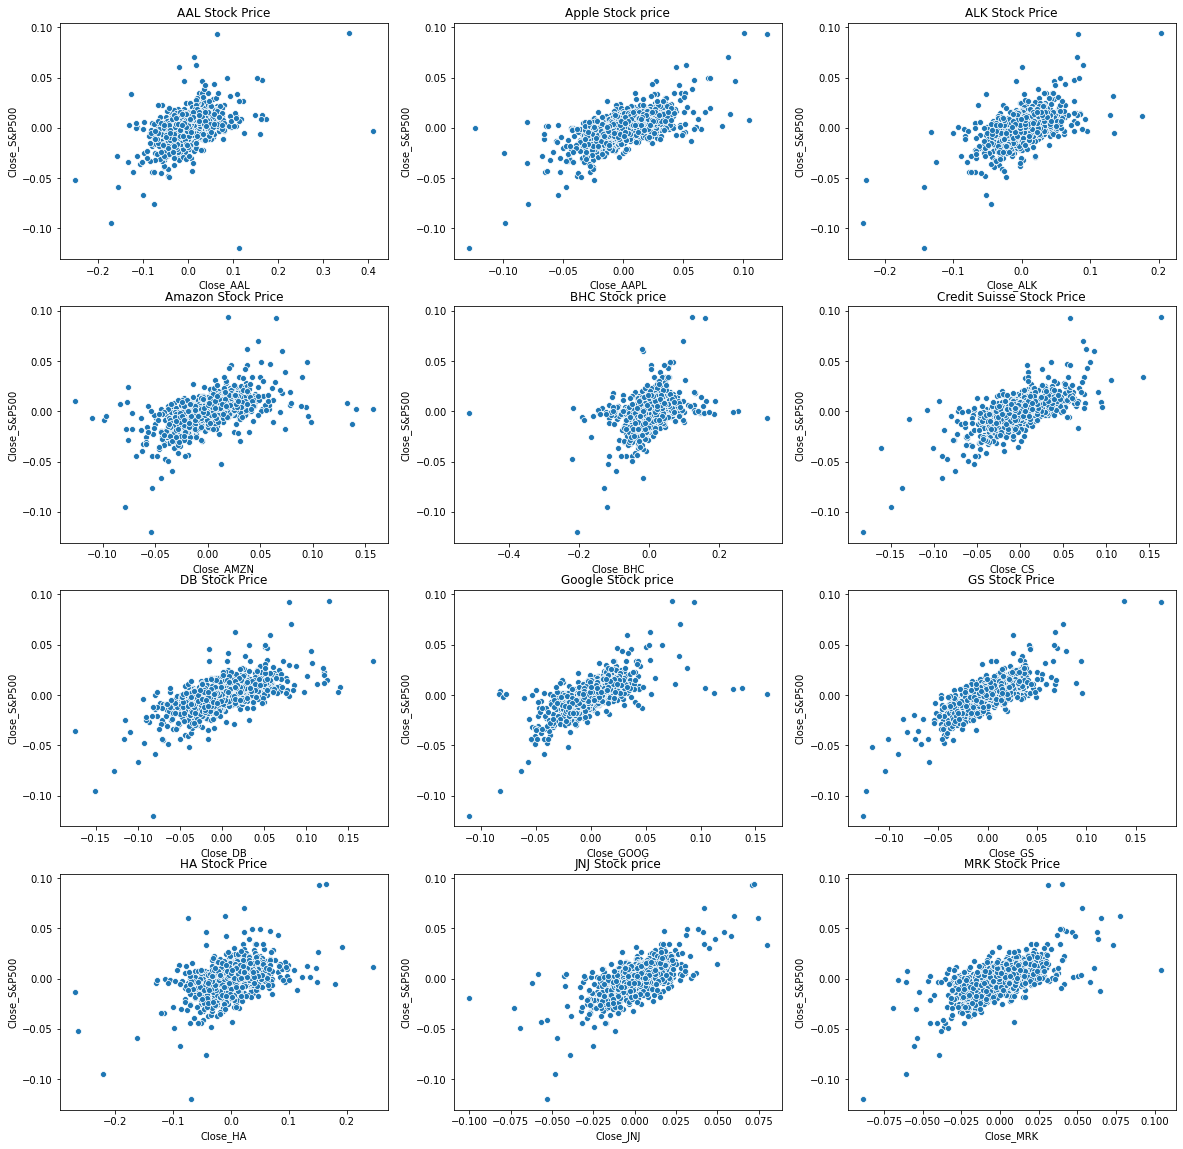

In [125]:
## Distribution of Stock Returns

plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.scatterplot(data=returns, x='Close_AAL', y= 'Close_S&P500')
plt.title('AAL Stock Price')
plt.subplot(4,3,2)
sns.scatterplot(data=returns, x='Close_AAPL', y= 'Close_S&P500')
plt.title('Apple Stock price')
plt.subplot(4,3,3)
sns.scatterplot(data=returns, x='Close_ALK', y= 'Close_S&P500')
plt.title('ALK Stock Price')
plt.subplot(4,3,4)
sns.scatterplot(data=returns, x='Close_AMZN', y= 'Close_S&P500')
plt.title('Amazon Stock Price')
plt.subplot(4,3,5)
sns.scatterplot(data=returns, x='Close_BHC', y= 'Close_S&P500')
plt.title('BHC Stock price')
plt.subplot(4,3,6)
sns.scatterplot(data=returns, x='Close_CS', y= 'Close_S&P500')
plt.title('Credit Suisse Stock Price')
plt.subplot(4,3,7)
sns.scatterplot(data=returns, x='Close_DB', y= 'Close_S&P500')
plt.title('DB Stock Price')
#plt.xticks(rotation=90)
plt.subplot(4,3,8)
sns.scatterplot(data=returns, x='Close_GOOG', y= 'Close_S&P500')
plt.title('Google Stock price')
plt.subplot(4,3,9)
sns.scatterplot(data=returns, x='Close_GS', y= 'Close_S&P500')
plt.title('GS Stock Price')
plt.subplot(4,3,10)
sns.scatterplot(data=returns, x='Close_HA', y= 'Close_S&P500')
plt.title('HA Stock Price')
#plt.xticks(rotation=90)
plt.subplot(4,3,11)
sns.scatterplot(data=returns, x='Close_JNJ', y= 'Close_S&P500')
plt.title('JNJ Stock price')
plt.subplot(4,3,12)
sns.scatterplot(data=returns, x='Close_MRK', y= 'Close_S&P500')
plt.title('MRK Stock Price')
plt.show()

#### Calculation  of Beta value of Stocks using Linear Regression Method

First, we use few of the stocks and calculate their Beta value which is the coefficient of the dependent variable.

In [126]:
## Use the AAL stock and S&P500

snp500 = returns['Close_S&P500']
aal = returns['Close_AAL']

In [127]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(aal, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [128]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_AAL   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     646.4
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          4.19e-127
Time:                        16:52:29   Log-Likelihood:                 5322.0
No. Observations:                2516   AIC:                        -1.064e+04
Df Residuals:                    2514   BIC:                        -1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.365e-05      0.001     -0.041   

Result/Findings :- Beta Value/Coefficient of AAL Stock comes out to be 1.3536

In [129]:
## For AAPL Stock

snp500 = returns['Close_S&P500']
aapl = returns['Close_AAPL']

In [130]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(aapl, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Close_AAPL   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1901.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          8.93e-310
Time:                        16:52:29   Log-Likelihood:                 7286.3
No. Observations:                2516   AIC:                        -1.457e+04
Df Residuals:                    2514   BIC:                        -1.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.000      2.281   

Result/Findings :- Beta Value/Coefficient of AAPL Stock comes out to be 1.0633

In [132]:
## For MRK Stock

snp500 = returns['Close_S&P500']
mrk = returns['Close_MRK']

In [133]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(mrk, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_MRK   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     1526.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          2.67e-261
Time:                        16:52:29   Log-Likelihood:                 7944.3
No. Observations:                2516   AIC:                        -1.588e+04
Df Residuals:                    2514   BIC:                        -1.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.235e-05      0.000      0.255   

Result/Findings :- Beta Value/Coefficient of MRK Stock comes out to be 0.7335

In [135]:
## GS Stock

snp500 = returns['Close_S&P500']
gs = returns['Close_GS']

In [136]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(gs, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Close_GS   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     3810.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:52:29   Log-Likelihood:                 7652.9
No. Observations:                2516   AIC:                        -1.530e+04
Df Residuals:                    2514   BIC:                        -1.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.000     -1.493   

Result/Findings :- Beta Value/Coefficient of GS Stock comes out to be 1.3013

In [138]:
## GOOG Stock

snp500 = returns['Close_S&P500']
goog = returns['Close_GOOG']

In [139]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(goog, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [140]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Close_GOOG   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     2165.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:52:29   Log-Likelihood:                 7571.3
No. Observations:                2516   AIC:                        -1.514e+04
Df Residuals:                    2514   BIC:                        -1.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.000      1.356   

Result/Findings :- Beta Value/Coefficient of MRK Stock comes out to be 1.0133

In [141]:
snp500 = returns['Close_S&P500']
amzn = returns['Close_AMZN']

In [142]:
# Adding a constant for the regression equation
X = sm.add_constant(snp500)

# make regression model 
model = sm.OLS(amzn, X)

# fit the model
results = model.fit()

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [143]:
# Printing results to extract the values

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Close_AMZN   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1085.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          3.80e-198
Time:                        16:52:29   Log-Likelihood:                 6738.4
No. Observations:                2516   AIC:                        -1.347e+04
Df Residuals:                    2514   BIC:                        -1.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0009      0.000      2.743   

#### Linear Regression Method to calculate Beta value of all the stocks together.

In [144]:
# splitting the data into dependent variable (Return on security) and independent variable (Return on market benchmark) 

X_train = returns.pop('Close_S&P500')
y_train = returns

In [145]:
# Adding a constant for the regression equation

X_train_lm = sm.add_constant(X_train)

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [146]:
# Create the regression model 

model = sm.OLS(y_train, X_train_lm)

In [147]:
# Fit the model

results = model.fit()

In [148]:
## Printing results to extract the values

results.params

0         1         2         3         4         5   \
const        -0.000024  0.000609  0.000109  0.000910 -0.000178 -0.000993   
Close_S&P500  1.353609  1.063349  1.231512  0.998802  1.315971  1.370002   

                    6         7         8         9         10        11  
const        -0.001132  0.000323 -0.000344  0.000163  0.000086  0.000052  
Close_S&P500  1.537546  1.013338  1.301286  1.233534  0.662233  0.733475

In [149]:
## Adding the results into a dataframe

coef = results.params
coef.columns = ['AAL', 'AAPL', 'ALK', 'AMZN', 'BHC', 'CS', 'DB', 'GOOG', 'GS', 'HA', 'JNJ', 'MRK']
coef

AAL      AAPL       ALK      AMZN       BHC        CS  \
const        -0.000024  0.000609  0.000109  0.000910 -0.000178 -0.000993   
Close_S&P500  1.353609  1.063349  1.231512  0.998802  1.315971  1.370002   

                    DB      GOOG        GS        HA       JNJ       MRK  
const        -0.001132  0.000323 -0.000344  0.000163  0.000086  0.000052  
Close_S&P500  1.537546  1.013338  1.301286  1.233534  0.662233  0.733475

#### Regression Equations

In [150]:
# Regression Equation for AAL Stock

print("constant: " + str(coef['AAL'][0]))
print("Beta: " + str(coef['AAL'][1]))

print("\nEquation: " + "(Ri - Rf) = " + str(coef['AAL'][0]) + " + " + str(coef['AAL'][1]) + " * (Rm - Rf)" )

constant: -2.364671966673351e-05
Beta: 1.3536094634798046

Equation: (Ri - Rf) = -2.364671966673351e-05 + 1.3536094634798046 * (Rm - Rf)


In [151]:
# Regression Equation for all the Stock

for i in coef:
    print("\n" + i + " Equation: " + " (Ri - Rf) = " + str(coef[i][0]) + " + " + str(coef[i][1]) + " * (Rm - Rf)" )


AAL Equation:  (Ri - Rf) = -2.364671966673351e-05 + 1.3536094634798046 * (Rm - Rf)

AAPL Equation:  (Ri - Rf) = 0.0006087624270655045 + 1.0633490784512958 * (Rm - Rf)

ALK Equation:  (Ri - Rf) = 0.00010856197844767513 + 1.2315115898862596 * (Rm - Rf)

AMZN Equation:  (Ri - Rf) = 0.0009102481408824367 + 0.9988023228754596 * (Rm - Rf)

BHC Equation:  (Ri - Rf) = -0.0001779619589030438 + 1.3159710386619652 * (Rm - Rf)

CS Equation:  (Ri - Rf) = -0.000993460441643842 + 1.3700019522413442 * (Rm - Rf)

DB Equation:  (Ri - Rf) = -0.0011316199914607357 + 1.5375460427388257 * (Rm - Rf)

GOOG Equation:  (Ri - Rf) = 0.00032308448194521514 + 1.0133380303647952 * (Rm - Rf)

GS Equation:  (Ri - Rf) = -0.00034445033288801636 + 1.3012856584091925 * (Rm - Rf)

HA Equation:  (Ri - Rf) = 0.00016326089153295616 + 1.2335339425572704 * (Rm - Rf)

JNJ Equation:  (Ri - Rf) = 8.562177498153694e-05 + 0.6622329843503917 * (Rm - Rf)

MRK Equation:  (Ri - Rf) = 5.235225692408589e-05 + 0.7334754871166239 * (Rm - R

In [152]:
## Transpose the coef dataframe

coef = coef.transpose()
coef.columns = ['Constant', 'Beta']
coef

Constant      Beta
AAL  -0.000024  1.353609
AAPL  0.000609  1.063349
ALK   0.000109  1.231512
AMZN  0.000910  0.998802
BHC  -0.000178  1.315971
CS   -0.000993  1.370002
DB   -0.001132  1.537546
GOOG  0.000323  1.013338
GS   -0.000344  1.301286
HA    0.000163  1.233534
JNJ   0.000086  0.662233
MRK   0.000052  0.733475

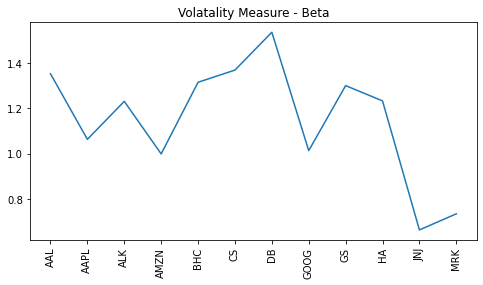

In [153]:
# Cumulative Returns Plot in Percent

plt.figure(figsize=[8,4])
plt.plot(coef['Beta'])
plt.xticks(rotation=90)
plt.title('Volatality Measure - Beta')
plt.show()

- High Beta values- American Airlines, Alaska, Bausch Health, Credit Suisse, Deutsche Bank, Goldman Sachs & Hawaiian Holdings.
- Beta close to 1 - Apple, Amazon and Google are correlated with the market.
- Low Beta values - Johnson & Johnson and Merck and CO.

#### Calculation of Expected Return of different Stocks

In [154]:
# Market Returns - Annualised Return of S&P500 Index

Rm = ann_returns_pct['Close_S&P500']
Rm

12.296594451619882

In [155]:
# Risk Free Rate is given - Rf

Rf = 0.75

In [156]:
## Calculation of Expected Return of different Stocks - Re

Re = dict()

for i in coef['Beta'].index:
    #print(coef[i][1])
    #print(Rf + coef['Beta'][i] * (Rm - Rf))
    Re[i] = Rf + coef['Beta'][i] * (Rm - Rf)
    #Re.append(Rf + coef[i][1] * (Rm - Rf))

In [157]:
## Print the Expected Return

Re

{'AAL': 16.379579520676074,
 'AAPL': 13.028060569380846,
 'ALK': 14.969764890886264,
 'AMZN': 12.28276535957883,
 'BHC': 15.9449838935067,
 'CS': 16.56885694045831,
 'DB': 18.50342060619823,
 'GOOG': 12.450603279025563,
 'GS': 15.775417763360107,
 'HA': 14.993116177016576,
 'JNJ': 8.396535702779909,
 'MRK': 9.21914398994}

In [158]:
## Adding the above calculated Expected Return to a dataframe

returns_expected = pd.DataFrame.from_dict(Re, orient='index', columns=['Expected Return'])
returns_expected

Expected Return
AAL         16.379580
AAPL        13.028061
ALK         14.969765
AMZN        12.282765
BHC         15.944984
CS          16.568857
DB          18.503421
GOOG        12.450603
GS          15.775418
HA          14.993116
JNJ          8.396536
MRK          9.219144

In [159]:
## Concatenate the dataframes - Expected Return and Coefficients

portfolio = pd.concat([coef, returns_expected], axis=1)
portfolio

Constant      Beta  Expected Return
AAL  -0.000024  1.353609        16.379580
AAPL  0.000609  1.063349        13.028061
ALK   0.000109  1.231512        14.969765
AMZN  0.000910  0.998802        12.282765
BHC  -0.000178  1.315971        15.944984
CS   -0.000993  1.370002        16.568857
DB   -0.001132  1.537546        18.503421
GOOG  0.000323  1.013338        12.450603
GS   -0.000344  1.301286        15.775418
HA    0.000163  1.233534        14.993116
JNJ   0.000086  0.662233         8.396536
MRK   0.000052  0.733475         9.219144

#### Stock Selection using Annualised Risk, Returns, Cumulative Returns, Beta

In [160]:
## Print the return_risk dataframe

return_risk

Ann Returns   Ann Risk  Cum Returns
Close_AAL       16.048889  51.950444    32.292788
Close_AAPL      28.416386  28.127302  1047.770050
Close_ALK       17.879160  37.404274   194.275967
Close_AMZN      35.220120  31.573504  1948.487305
Close_BHC       11.697321  56.671428   -39.650485
Close_CS        -8.188845  35.250863   -76.389269
Close_DB        -9.610244  41.867595   -84.029028
Close_GOOG      20.602336  25.856093   461.283184
Close_GS         7.321234  29.099614    36.066354
Close_HA        19.282441  47.857323   116.275168
Close_JNJ       10.300879  17.218738   141.101223
Close_MRK       10.338527  20.714241   126.639348
Close_S&P500    12.296594  17.357439   193.394056

In [161]:
return_risk = return_risk.rename(index={'Close_AAL': 'AAL', 'Close_AAPL': 'AAPL', 'Close_ALK': 'ALK', 'Close_AMZN': 'AMZN',
                          'Close_BHC': 'BHC', 'Close_CS': 'CS', 'Close_DB': 'DB', 'Close_GOOG': 'GOOG', 'Close_GS': 'GS', 
                          'Close_HA': 'HA', 'Close_JNJ': 'JNJ', 'Close_MRK': 'MRK', 'Close_S&P500': 'S&P500' })

In [162]:
## Add Beta value to same dataframe for comparison

return_risk['Beta'] = portfolio['Beta']
return_risk

Ann Returns   Ann Risk  Cum Returns      Beta
AAL       16.048889  51.950444    32.292788  1.353609
AAPL      28.416386  28.127302  1047.770050  1.063349
ALK       17.879160  37.404274   194.275967  1.231512
AMZN      35.220120  31.573504  1948.487305  0.998802
BHC       11.697321  56.671428   -39.650485  1.315971
CS        -8.188845  35.250863   -76.389269  1.370002
DB        -9.610244  41.867595   -84.029028  1.537546
GOOG      20.602336  25.856093   461.283184  1.013338
GS         7.321234  29.099614    36.066354  1.301286
HA        19.282441  47.857323   116.275168  1.233534
JNJ       10.300879  17.218738   141.101223  0.662233
MRK       10.338527  20.714241   126.639348  0.733475
S&P500    12.296594  17.357439   193.394056       NaN

#### Obeservations, Findings & Comparisons.

- On observing the Scatter Plots of stocks with Market Index, we can see that Google, Goldman Sachs and Johnson & Johnson seems to be correlated with the market index.

- Beta Values for AAL, ALK, BHC, CS, DB, GS, HA are high which explains high volatility of these stocks with respect to Market.

- Beta values for AAPL, AMZN, GOOG are inline or comparable with the market.

- Beta values for Johnson & Johnson and MRK are less volatile than the market.

- The Annualised Market Returns S&P500 is 12.3%.

- Given Risk Free Rate is 0.75%.

- Expected Returns are hence calculated based on above metrics.

- We will now compare the stocks with respect to below parameters for selection -

    - Beta Value
    - Annualised Risk
    - Cumulative Returns
    - Annualised Returns
    
- Beta ~1: 
  - Google, Apple & Amazon
    - Low Risk
    - High Returns

- Beta >1: 
  - Deutsche Bank, Credit Suisse,  Bausch Health
    - Negative Cumulative Returns
    - High Risk
    
  - American Airlines Group
    - Good Returns
    - High Risk
    
  - Goldman Sachs
    - Good Returns
    - Low Risk
    
  - Alaska Air Group
    - Good Returns
    - Less Risk
   
  - Hawaiian Holdings
    - High Returns
    - High Risk
     
- Beta <1:
  - Johnson & Johnson, Merck and CO
    - High Returns
    - Less Risk
   
- Based on above findings and Investor Persona, we will choose below stocks in our portfolio:
  - **Google**
  - **Apple**
  - **Goldman Sachs**
  - **Alaska Air Group**
  
- The above choice of stocks seems to be pretty good choice for our portfolio.

##### Please note that the above comparison and findings have been done based on the investor's requirement who wants to invest in stocks which shows promise but are also stable. 

Let us now proceed and calculate Portfolio Beta, Returns and other metrics for above chosen stocks.<br/> 
The weight of stocks will be equal for all the selected stocks.

In [163]:
# Creating a new column namely Stock Flag in dataframe to select the stocks -

## 1 - Stock is selected
## 0 - Stock is not selected

portfolio['Stock Flag'] = 0

In [164]:
## Set the Stock Flag as 1 for selected stocks

for i in portfolio.index:
    #print(i)
    if i in ['GOOG', 'GS', 'AAPL', 'ALK']:
        portfolio.loc[i, 'Stock Flag'] = 1

In [165]:
## Check the rows and columns of the dataframe

portfolio

Constant      Beta  Expected Return  Stock Flag
AAL  -0.000024  1.353609        16.379580           0
AAPL  0.000609  1.063349        13.028061           1
ALK   0.000109  1.231512        14.969765           1
AMZN  0.000910  0.998802        12.282765           0
BHC  -0.000178  1.315971        15.944984           0
CS   -0.000993  1.370002        16.568857           0
DB   -0.001132  1.537546        18.503421           0
GOOG  0.000323  1.013338        12.450603           1
GS   -0.000344  1.301286        15.775418           1
HA    0.000163  1.233534        14.993116           0
JNJ   0.000086  0.662233         8.396536           0
MRK   0.000052  0.733475         9.219144           0

#### Calculation of the Portfolio Returns of Selected Stocks

In [166]:
## Initialising the weight for the Stocks

weight = np.repeat(1, 12)/sum(portfolio['Stock Flag'])
weight

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25])

In [167]:
## Add Weight to the portfolio dataframe

portfolio['Weight'] = weight * portfolio['Stock Flag']

In [168]:
## Check the rows and columns of the dataframe

portfolio

Constant      Beta  Expected Return  Stock Flag  Weight
AAL  -0.000024  1.353609        16.379580           0    0.00
AAPL  0.000609  1.063349        13.028061           1    0.25
ALK   0.000109  1.231512        14.969765           1    0.25
AMZN  0.000910  0.998802        12.282765           0    0.00
BHC  -0.000178  1.315971        15.944984           0    0.00
CS   -0.000993  1.370002        16.568857           0    0.00
DB   -0.001132  1.537546        18.503421           0    0.00
GOOG  0.000323  1.013338        12.450603           1    0.25
GS   -0.000344  1.301286        15.775418           1    0.25
HA    0.000163  1.233534        14.993116           0    0.00
JNJ   0.000086  0.662233         8.396536           0    0.00
MRK   0.000052  0.733475         9.219144           0    0.00

In [169]:
## Add a column Beta Total with respect to weight

portfolio['Beta Total'] = portfolio['Beta'] * portfolio['Weight'] 
portfolio

Constant      Beta  Expected Return  Stock Flag  Weight  Beta Total
AAL  -0.000024  1.353609        16.379580           0    0.00    0.000000
AAPL  0.000609  1.063349        13.028061           1    0.25    0.265837
ALK   0.000109  1.231512        14.969765           1    0.25    0.307878
AMZN  0.000910  0.998802        12.282765           0    0.00    0.000000
BHC  -0.000178  1.315971        15.944984           0    0.00    0.000000
CS   -0.000993  1.370002        16.568857           0    0.00    0.000000
DB   -0.001132  1.537546        18.503421           0    0.00    0.000000
GOOG  0.000323  1.013338        12.450603           1    0.25    0.253335
GS   -0.000344  1.301286        15.775418           1    0.25    0.325321
HA    0.000163  1.233534        14.993116           0    0.00    0.000000
JNJ   0.000086  0.662233         8.396536           0    0.00    0.000000
MRK   0.000052  0.733475         9.219144           0    0.00    0.000000

In [170]:
## Portfolio Beta

portfolio_beta = sum(portfolio['Beta Total'])
portfolio_beta

1.1523710892778858

#### Calculation of Portfolio Returns

In [171]:
## Portfolio Returns Calculation

portfolio_returns = Rf + portfolio_beta * (Rm - Rf)
portfolio_returns

14.055961625663196

In [172]:
## Creating a dataframe with Selected Stocks

pf = portfolio[portfolio['Stock Flag'] == 1]
pf = pf[['Expected Return', 'Beta', 'Beta Total']]
pf

Expected Return      Beta  Beta Total
AAPL        13.028061  1.063349    0.265837
ALK         14.969765  1.231512    0.307878
GOOG        12.450603  1.013338    0.253335
GS          15.775418  1.301286    0.325321

#### Portfolio Risk – Portfolio Standard Deviation

By looking into the portfolio standard deviation formula, we need three elements:

- Portfolio weight array
- Portfolio covariance matrix
- Transpose of portfolio weight array

In [173]:
# Covariance matrix for the portfolio of selected stocks

covariance_portfolio = returns[[ 'Close_GOOG', 'Close_GS', 'Close_AAPL', 'Close_ALK']]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

Close_GOOG  Close_GS  Close_AAPL  Close_ALK
Close_GOOG    0.066854  0.036616    0.038189   0.034216
Close_GS      0.036616  0.084679    0.037208   0.054328
Close_AAPL    0.038189  0.037208    0.079115   0.034074
Close_ALK     0.034216  0.054328    0.034074   0.139908

In [174]:
# Applying the matrix operations mentioned in the image above

portfolio_variance = np.dot(weight[:4].T,np.dot(covariance_portfolio, weight[:4]))

In [175]:
# Standard deviation (risk of portfolio)

portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.22910379914496606

#### Sharpe Ratio

In [176]:
## Calculating the Sharpe Ratio to validate

Sharpe_Ratio = (portfolio_returns - Rf) / (portfolio_risk * 100)
Sharpe_Ratio

0.5807831068416204

#### Annualized Sharp Ratio

In [177]:
## Calculating the Annualised Sharpe Ratio

Ann_Sharpe_Ratio = np.sqrt(252) * Sharpe_Ratio
Ann_Sharpe_Ratio

9.219645998222301

#### Obervations/Findings for overall Portfolio:

- Portfolio Beta is 1.15
- Portfolio Returns is 14.1%
- Portfolio Risk is 22.9%
- Sharpe Ratio is 0.58

#### This seems to be a good choice of stocks for our portfolio as Beta value is close to 1 which signifies strong correlation with the market, the overall returns is approx 2% more than the Market Returns, lesser risk and a good Sharpe Ratio.

## Step 4: Stock Price Prediction - Validation

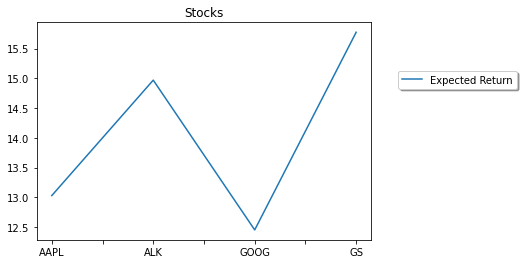

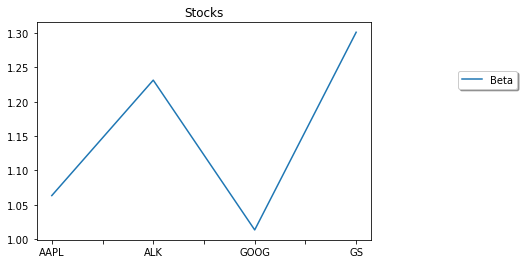

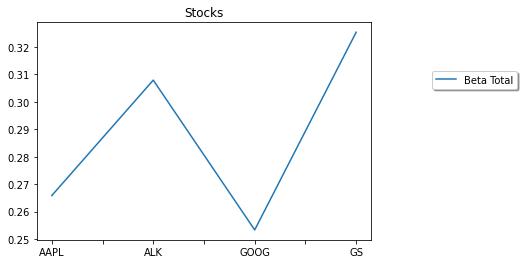

In [178]:
# Visualize the new series

for i in pf.columns:
    pf[i].plot(kind = 'line', legend = 'reverse', title = 'Stocks')
    plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.45, 0.8))
    plt.show()

#### Stationarity Test

In [179]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

for col in pf.columns:
    kpss_test = kpss(pf[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

Expected Return
KPSS Statistic: 0.500000
Critical Values @ 0.05: 0.46
p-value: 0.041667

Series is Stationary

--------------------------------------

Beta
KPSS Statistic: 0.500000
Critical Values @ 0.05: 0.46
p-value: 0.041667

Series is Stationary

--------------------------------------

Beta Total
KPSS Statistic: 0.500000
Critical Values @ 0.05: 0.46
p-value: 0.041667

Series is Stationary

--------------------------------------



C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


All the series are stationary. Hence, differencing is required not for any of the metrics. 

### Train-test split

In [180]:
# Keeping only last days data as test 

train_len = 2514
test_len = 3

### Model building

In [181]:
## AAPL Stock

sel_stocks = data[['Close_AAPL', 'Volume_AAPL']]
sel_stocks.head()

Close_AAPL  Volume_AAPL
Date                               
2010-10-01   10.090000    448142800
2010-10-04    9.951428    435302000
2010-10-05   10.319285    501967200
2010-10-06   10.328215    670868800
2010-10-07   10.329286    408399600

In [182]:
# Train data
train_data = sel_stocks[:train_len] 

# Test data
test_data = sel_stocks[train_len:]

In [183]:
train_data.shape, test_data.shape

((2514, 2), (3, 2))

#### Model Fitting

In [184]:
# Fitting the VAR model to the data

model = VAR(train_data)

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [185]:
# To select the lag order

x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [186]:
# Providing maxlags as 43 (minimum AIC vaue)

results = model.fit(maxlags = 43, ic = 'aic')

In [187]:
# Printing the results - Evaluation parameters, lag coefficients, etc.

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jan, 2022
Time:                     16:52:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    36.9910
Nobs:                     2471.00    HQIC:                   36.7304
Log likelihood:          -52035.1    FPE:                7.71339e+15
AIC:                      36.5817    Det(Omega_mle):     7.19763e+15
--------------------------------------------------------------------
Results for equation Close_AAPL
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.002192         0.067312           -0.033           0.974
L1.Close_AAPL           0.937035         0.020517           45.672           0.000
L1.Volume_AAPL          0.000000         0.0000

In [188]:
# Forecasting using the VAR model
# Selecting the lag value from the above results

lag_order = 43

In [189]:
# Obtaining the forecast values

predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = sel_stocks.index[train_len:], columns = sel_stocks.columns)

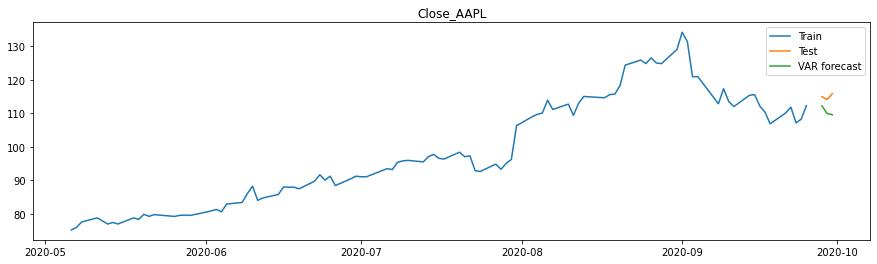

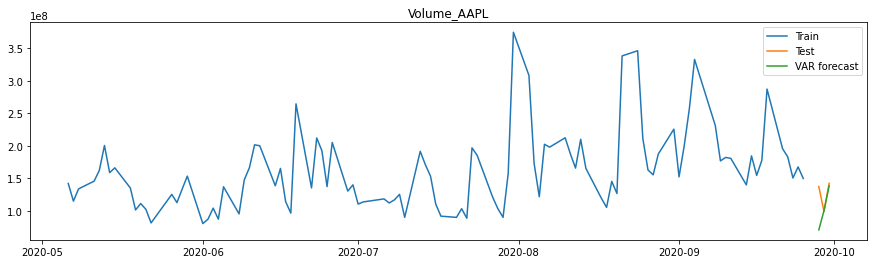

In [190]:
# Printing the train, test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len-100:train_len], label='Train')
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

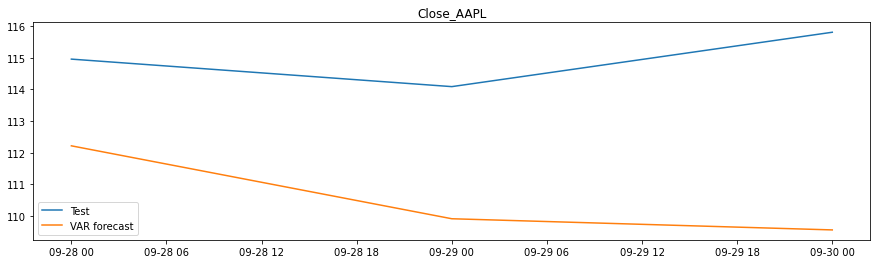

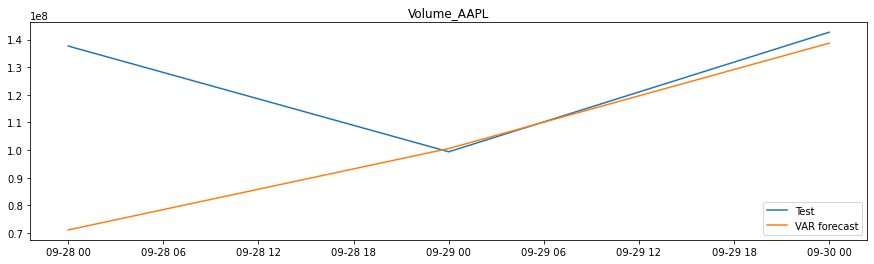

In [191]:
# Comparing the test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

In [192]:
# Model Evaluation

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])


for col in sel_stocks.columns[sel_stocks.columns.str.contains('Close')]:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column  RMSE  MAPE
0  Close_AAPL  4.62  3.82

In [193]:
## ALK Stock

sel_stocks = data[['Close_ALK', 'Volume_ALK']]
sel_stocks.head()

Close_ALK  Volume_ALK
Date                             
2010-10-01    12.4475   1663600.0
2010-10-04    12.1425   1512400.0
2010-10-05    12.2150   2567200.0
2010-10-06    12.1875   1043600.0
2010-10-07    11.6250   7682400.0

In [194]:
# Train data
train_data = sel_stocks[:train_len] 

# Test data
test_data = sel_stocks[train_len:]

In [195]:
train_data.shape, test_data.shape

((2514, 2), (3, 2))

#### Model Fitting

In [196]:
# Fitting the VAR model to the data

model = VAR(train_data)

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [197]:
# To select the lag order

x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [198]:
# Providing maxlags as 8 (minimum AIC vaue)

results = model.fit(maxlags = 8, ic = 'aic')

In [199]:
# Printing the results - Evaluation parameters, lag coefficients, etc.

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jan, 2022
Time:                     16:52:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    27.7853
Nobs:                     2506.00    HQIC:                   27.7349
Log likelihood:          -41793.6    FPE:                1.07812e+12
AIC:                      27.7062    Det(Omega_mle):     1.06364e+12
--------------------------------------------------------------------
Results for equation Close_ALK
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.198338         0.080833            2.454           0.014
L1.Close_ALK          0.963855         0.020050           48.074           0.000
L1.Volume_ALK        -0.000000         0.000000         

In [200]:
# Forecasting using the VAR model
# Selecting the lag value from the above results

lag_order = 8

In [201]:
# Obtaining the forecast values

predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = sel_stocks.index[train_len:], columns = sel_stocks.columns)

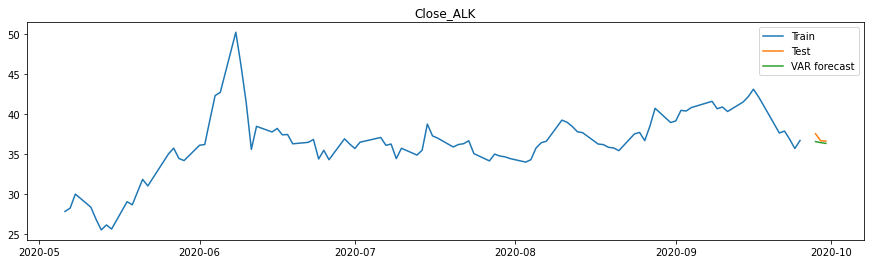

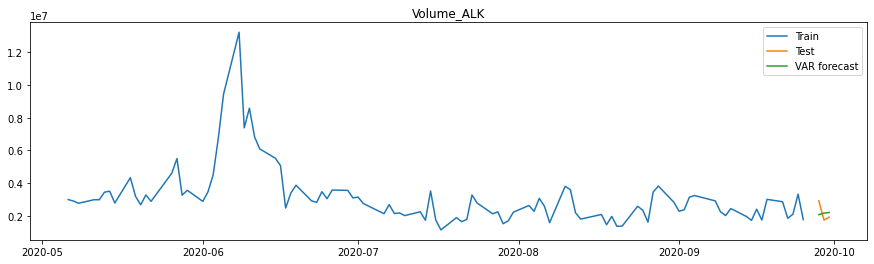

In [202]:
# Printing the train, test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len-100:train_len], label='Train')
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

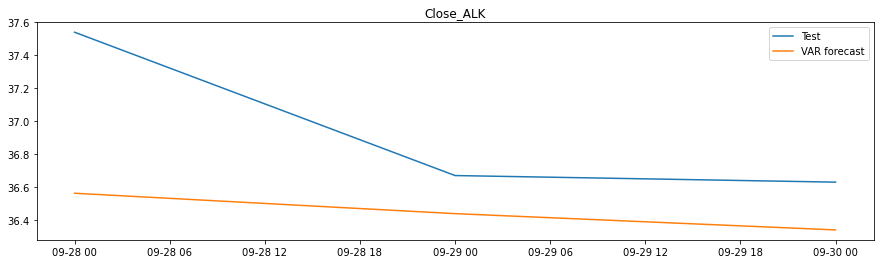

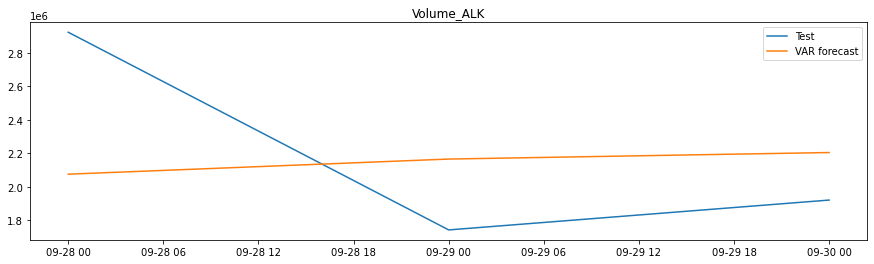

In [203]:
# Comparing the test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

In [204]:
## Model Evaluation

tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in sel_stocks.columns[sel_stocks.columns.str.contains('Close')]:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column  RMSE  MAPE
0  Close_AAPL  4.62  3.82
0   Close_ALK  0.60  1.34

In [205]:
## GOOG Stock

sel_stocks = data[['Close_GOOG', 'Volume_GOOG']]
sel_stocks.head()

Close_GOOG  Volume_GOOG
Date                               
2010-10-01  261.828613    4466600.0
2010-10-04  260.199707    3895400.0
2010-10-05  268.110046    7040400.0
2010-10-06  266.177307    5545200.0
2010-10-07  264.015411    4809400.0

In [206]:
# Train data
train_data = sel_stocks[:train_len] 

# Test data
test_data = sel_stocks[train_len:]

In [207]:
train_data.shape, test_data.shape

((2514, 2), (3, 2))

#### Model Fitting

In [208]:
# Fitting the VAR model to the data

model = VAR(train_data)

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [209]:
# To select the lag order

x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [210]:
# Providing maxlags as 17 (minimum AIC vaue)

results = model.fit(maxlags = 17, ic = 'aic')

In [211]:
# Printing the results - Evaluation parameters, lag coefficients, etc.

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jan, 2022
Time:                     16:52:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    33.8343
Nobs:                     2497.00    HQIC:                   33.7303
Log likelihood:          -49054.4    FPE:                4.19892e+14
AIC:                      33.6710    Det(Omega_mle):     4.08364e+14
--------------------------------------------------------------------
Results for equation Close_GOOG
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   2.178059         1.359142            1.603           0.109
L1.Close_GOOG           0.913771         0.020117           45.423           0.000
L1.Volume_GOOG         -0.000000         0.0000

In [212]:
# Forecasting using the VAR model
# Selecting the lag value from the above results

lag_order = 17

In [213]:
# Obtaining the forecast values

predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = sel_stocks.index[train_len:], columns = sel_stocks.columns)

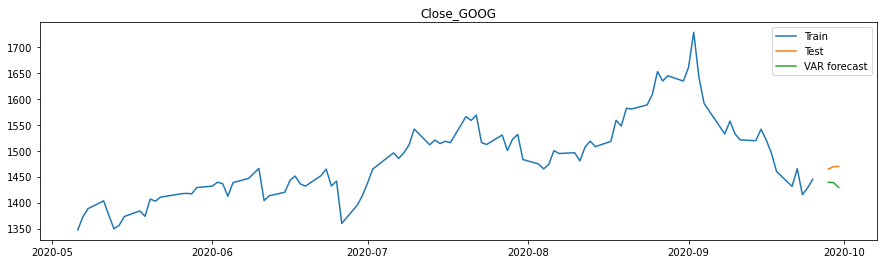

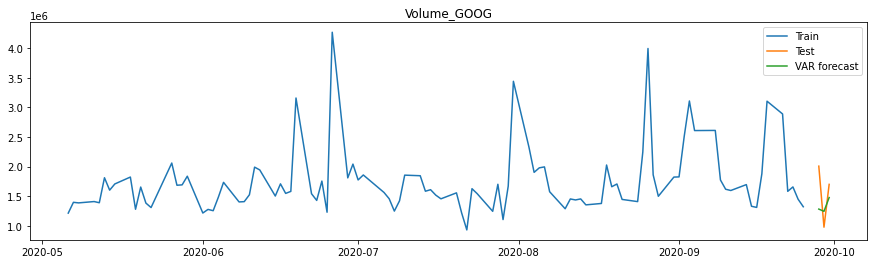

In [214]:
# Printing the train, test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len-100:train_len], label='Train')
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

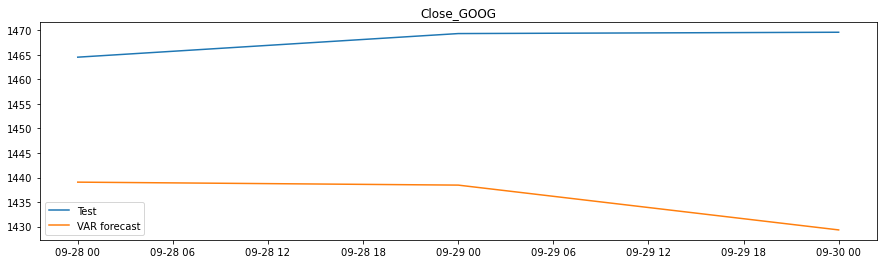

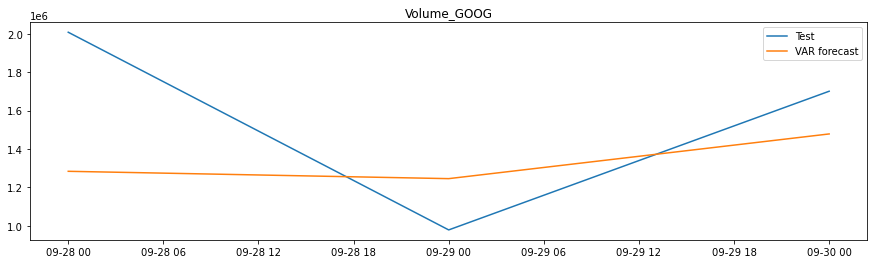

In [215]:
# Comparing the test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

In [216]:
# Model Evaluation

tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])


for col in sel_stocks.columns[sel_stocks.columns.str.contains('Close')]:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column   RMSE  MAPE
0  Close_AAPL   4.62  3.82
0   Close_ALK   0.60  1.34
0  Close_GOOG  32.78  2.19

In [217]:
## GS Stock

sel_stocks = data[['Close_GS', 'Volume_GS']]
sel_stocks.head()

Close_GS  Volume_GS
Date                             
2010-10-01  147.699997  7439800.0
2010-10-04  146.570007  5866700.0
2010-10-05  149.570007  8724700.0
2010-10-06  150.839996  6330600.0
2010-10-07  151.110001  4471500.0

In [218]:
# Train data
train_data = sel_stocks[:train_len] 

# Test data
test_data = sel_stocks[train_len:]

In [219]:
train_data.shape, test_data.shape

((2514, 2), (3, 2))

#### Model Fitting

In [220]:
# Fitting the VAR model to the data

model = VAR(train_data)

C:\Users\Public\Sakshi\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [221]:
# To select the lag order

x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [222]:
# Providing maxlags as 10 (minimum AIC vaue)

results = model.fit(maxlags = 10, ic = 'aic')

In [223]:
# Printing the results - Evaluation parameters, lag coefficients, etc.

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jan, 2022
Time:                     16:52:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    30.8813
Nobs:                     2504.00    HQIC:                   30.8191
Log likelihood:          -45605.1    FPE:                2.33968e+13
AIC:                      30.7836    Det(Omega_mle):     2.30092e+13
--------------------------------------------------------------------
Results for equation Close_GS
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.131533         0.455411            2.485           0.013
L1.Close_GS           0.929678         0.020101           46.250           0.000
L1.Volume_GS          0.000000         0.000000          

In [224]:
# Forecasting using the VAR model
# Selecting the lag value from the above results

lag_order = 10

In [225]:
# Obtaining the forecast values

predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = sel_stocks.index[train_len:], columns = sel_stocks.columns)

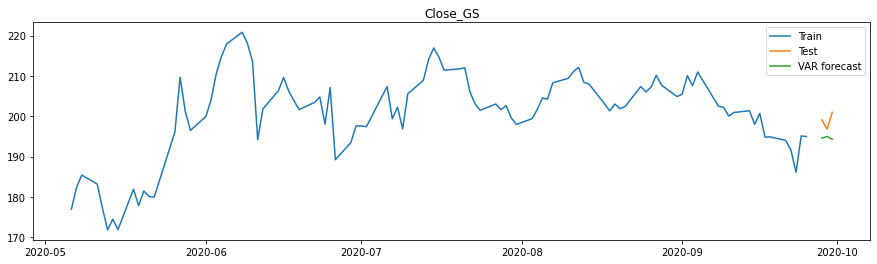

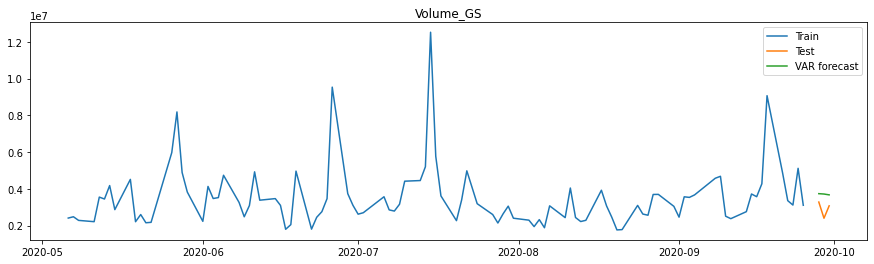

In [226]:
# Printing the train, test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len-100:train_len], label='Train')
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

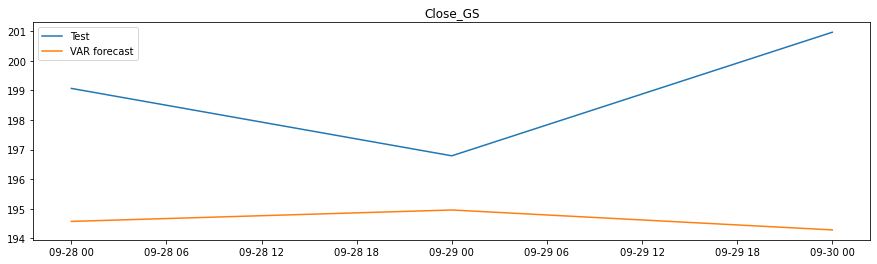

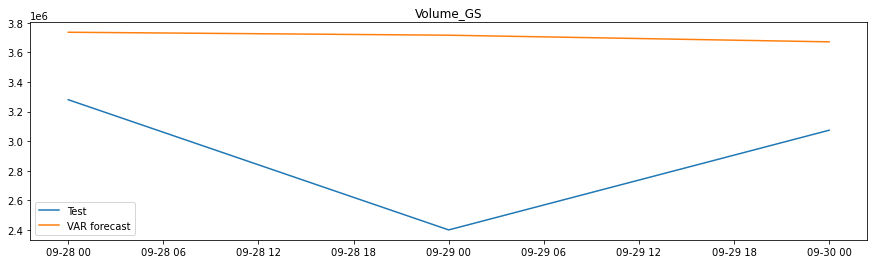

In [227]:
# Comparing the test and forecasted values

for col in sel_stocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(sel_stocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

In [228]:
# Model Evaluation

tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])


for col in sel_stocks.columns[sel_stocks.columns.str.contains('Close')]:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column   RMSE  MAPE
0  Close_AAPL   4.62  3.82
0   Close_ALK   0.60  1.34
0  Close_GOOG  32.78  2.19
0    Close_GS   4.77  2.17

#### Obervations, Findings and Comparisons

- Selected the test/validated set for 3 days for prediction/forecasting.
- Alaska Air Group has pretty close prediction/forecast with the test dataset observed from the visuals/plots. This can also be confirmed with error measures such as RMSE & MAPE.
- Alaska Air Group has the least RMSE and MAPE values compared with all the other selected stocks.
- Google has highest RMSE value and Apple has highest MAPE value.